## July 12 2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
start_time = time.time()
df = pd.read_feather('D:/internship-telkom/data-science/slow-connection/CW02_dataset.ftr')
print('Time elapsed: {}'.format((time.time() - start_time)))

Time elapsed: 0.7744832038879395


In [19]:
def percentage_bin136(score_name):
    '''
    Creates subplots of percentage/proportion of score 4 and score -1 in the dataframe in 1-hour, 3-hour, and 6-hour interval before or after the reportdate.
    
    user_id: str = user id
    score_name: str = score variables in the dataframe
    
    How to call this function -> df1, df3, df6 = percentage_bin136(user_id, score_name)
    '''
    sns.set_style('whitegrid')
    sns.set_palette('summer')
    
    ## Dataframe(s)
    # 1-hour interval
    bin1 = df[['bin_1h',
           'date_time',
           'reportdate',
           'int_latency_score',
           'ext_latency_score',
           'fd_latency_score',
           'int_ploss_score',
           'ext_ploss_score',
           'ses_setup_score',
           'ser_acces_score']][(df['bin_1h'] >= -48) & (df['bin_1h'] <= 24)]
    bin1 = bin1.sort_values('bin_1h').reset_index(drop=True).drop_duplicates().drop(['date_time', 'reportdate'], axis=1)
    
    df1 = pd.DataFrame(columns=['bin_1h', 'score_4_percentage', 'score_min1_percentage'])
    df1['bin_1h'] = [i for i in range(-48, 25)]
    df1.set_index('bin_1h', inplace=True)
    for n in range(-48, 25):
        df1['score_4_percentage'].loc[n] = round(bin1[bin1['bin_1h'] == n].loc[bin1[score_name] == 4, score_name].count() / bin1[score_name][bin1['bin_1h'] == n].count() * 100, 3)
        df1['score_min1_percentage'].loc[n] = round(bin1[bin1['bin_1h'] == n].loc[bin1[score_name] == -1, score_name].count() / bin1[score_name][bin1['bin_1h'] == n].count() * 100, 3)
    
    # 3-hour interval
    bin3 = df[['bin_3h',
           'date_time',
           'reportdate',
           'int_latency_score',
           'ext_latency_score',
           'fd_latency_score',
           'int_ploss_score',
           'ext_ploss_score',
           'ses_setup_score',
           'ser_acces_score']][(df['bin_3h'] >= -16) & (df['bin_3h'] <= 8)]
    bin3 = bin3.sort_values('bin_3h').reset_index(drop=True).drop_duplicates().drop(['date_time', 'reportdate'], axis=1)
    
    df3 = pd.DataFrame(columns=['bin_3h', 'score_4_percentage', 'score_min1_percentage'])
    df3['bin_3h'] = [i for i in range(-16, 9)]
    df3.set_index('bin_3h', inplace=True)
    for n in range(-16, 9):
        df3['score_4_percentage'].loc[n] = round(bin3[bin3['bin_3h'] == n].loc[bin3[score_name] == 4, score_name].count() / bin3[score_name][bin3['bin_3h'] == n].count() * 100, 3)
        df3['score_min1_percentage'].loc[n] = round(bin3[bin3['bin_3h'] == n].loc[bin3[score_name] == -1, score_name].count() / bin3[score_name][bin3['bin_3h'] == n].count() * 100, 3)
      
    # 6-hour interval
    bin6 = df[['bin_6h',
           'date_time',
           'reportdate',
           'int_latency_score',
           'ext_latency_score',
           'fd_latency_score',
           'int_ploss_score',
           'ext_ploss_score',
           'ses_setup_score',
           'ser_acces_score']][(df['bin_6h'] >= -8) & (df['bin_6h'] <= 4)]
    bin6 = bin6.sort_values('bin_6h').reset_index(drop=True).drop_duplicates().drop(['date_time', 'reportdate'], axis=1)
    
    df6 = pd.DataFrame(columns=['bin_6h', 'score_4_percentage', 'score_min1_percentage'])
    df6['bin_6h'] = [i for i in range(-8, 5)]
    df6.set_index('bin_6h', inplace=True)
    for n in range(-8, 5):
        df6['score_4_percentage'].loc[n] = round(bin6[bin6['bin_6h'] == n].loc[bin6[score_name] == 4, score_name].count() / bin6[score_name][bin6['bin_6h'] == n].count() * 100, 3)
        df6['score_min1_percentage'].loc[n] = round(bin6[bin6['bin_6h'] == n].loc[bin6[score_name] == -1, score_name].count() / bin6[score_name][bin6['bin_6h'] == n].count() * 100, 3)
      
    
    
    ## Plot(s)
    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 10), sharey=True)
    ax[0, 0].set_ylim([-5, 25])

    # 1-hour interval
    sns.scatterplot(ax=ax[0, 0], data=df1.reset_index(), x='bin_1h', y='score_4_percentage', palette='summer') 
    ax[0, 0].set_title('{} =4 Percentage in 1-Hour Interval'.format(score_name))
    ax[0, 0].axvline(0, color='red')
    ax[0, 0].set_ylabel('')
    ax[0, 0].set_xlabel('bin_1h')
    ax[0, 0].set_xlim([-53, 29])
    ax[0, 0].set_xticks([-48, -36, -24, -12, 0, 12, 24])

    sns.scatterplot(ax=ax[0, 1], data=df1.reset_index(), x='bin_1h', y='score_min1_percentage', palette='summer')
    ax[0, 1].set_title('{} =-1 Percentage in 1-Hour Interval'.format(score_name))
    ax[0, 1].axvline(0, color='red')
    ax[0, 1].set_ylabel('')
    ax[0, 1].set_xlabel('bin_1h')
    ax[0, 1].set_xlim([-53, 29])
    ax[0, 1].set_xticks([-48, -36, -24, -12, 0, 12, 24])
    
    # 3-hour interval
    sns.scatterplot(ax=ax[1, 0], data=df3.reset_index(), x='bin_3h', y='score_4_percentage', palette='summer') 
    ax[1, 0].set_title('{} =4 Percentage in 3-Hour Interval'.format(score_name))
    ax[1, 0].axvline(0, color='red')
    ax[1, 0].set_ylabel('Percentage (%)')
    ax[1, 0].set_xlabel('bin_3h')
    ax[1, 0].set_xlim([-18, 10])
    ax[1, 0].set_xticks([-16, -8, 0, 8])

    sns.scatterplot(ax=ax[1, 1], data=df3.reset_index(), x='bin_3h', y='score_min1_percentage', palette='summer')
    ax[1, 1].set_title('{} =-1 Percentage in 3-Hour Interval'.format(score_name))
    ax[1, 1].axvline(0, color='red')
    ax[1, 1].set_ylabel('')
    ax[1, 1].set_xlabel('bin_3h')
    ax[1, 1].set_xlim([-18, 10])
    ax[1, 1].set_xticks([-16, -8, 0, 8])
    
    # 6-hour interval
    sns.scatterplot(ax=ax[2, 0], data=df6.reset_index(), x='bin_6h', y='score_4_percentage', palette='summer') 
    ax[2, 0].set_title('{} =4 Percentage in 6-Hour Interval'.format(score_name))
    ax[2, 0].axvline(0, color='red')
    ax[2, 0].set_ylabel('')
    ax[2, 0].set_xlabel('bin_6h')
    ax[2, 0].set_xlim([-10, 6])
    ax[2, 0].set_xticks([-8, -4, 0, 4])

    sns.scatterplot(ax=ax[2, 1], data=df6.reset_index(), x='bin_6h', y='score_min1_percentage', palette='summer')
    ax[2, 1].set_title('{} =-1 Percentage in 6-Hour Interval'.format(score_name))
    ax[2, 1].axvline(0, color='red')
    ax[2, 1].set_ylabel('')
    ax[2, 1].set_xlabel('bin_6h')
    ax[2, 1].set_xlim([-10, 6])
    ax[2, 1].set_xticks([-8, -4, 0, 4])
    
    fig.subplots_adjust(hspace=0.4)
    fig.show()
    
    return df1, df3, df6

Time elapsed: 2.8460206985473633


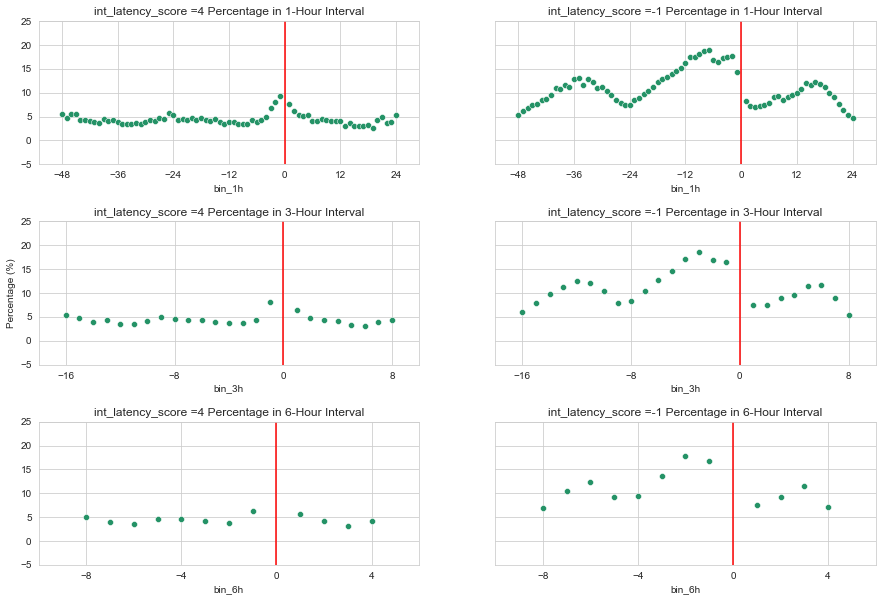

In [20]:
start_time = time.time()

df1, df3, df6 = percentage_bin136(score_name='int_latency_score')

print('Time elapsed: {}'.format((time.time() - start_time)))

In [21]:
round(df[(df['bin_1h'] >= -48) & (df['bin_1h'] <= 24)].loc[df['int_latency_score'] == 4, 'int_latency_score'].count() / df['int_latency_score'][(df['bin_1h'] >= -48) & (df['bin_1h'] <= 24)].count() * 100, 3)

4.419

Mas Bilvy:
Sekarang diitung misal kalo kita prediksi ada sekian persen skor 4 dalam 3 jam, ini orang akan laporan dalam 3 jam kedepan apa ngga. Terus diitung berapa kalo bener berapa salah (bisa bikin conf matrix).
Kaya bikin prediksi tapi pake treshold, belum pake model.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349555 entries, 0 to 1349554
Data columns (total 34 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   user_id                      1349555 non-null  object        
 1   date_time                    1349555 non-null  datetime64[ns]
 2   reportdate                   1349555 non-null  object        
 3   reg                          1349555 non-null  object        
 4   cwitel                       1349555 non-null  object        
 5   speed_id                     1349555 non-null  object        
 6   lcat                         1349555 non-null  object        
 7   device_count                 1349555 non-null  int64         
 8   apps_count                   1349555 non-null  int64         
 9   avg_activity_sec             1349555 non-null  float64       
 10  avg_volume_in                1349555 non-null  float64       
 11  avg_volume_

In [26]:
rep = df[['int_latency_score', 'bin_1h']][(df['bin_1h'] >= -3) & (df['bin_1h'] < 0)]
rep

,int_latency_score,bin_1h
109,1,-3.0
177,1,-2.0
214,1,-2.0
848,1,-1.0
852,1,-3.0
...,...,...
1348910,1,-1.0
1349033,1,-1.0
1349090,1,-1.0
1349508,3,-1.0


In [27]:
rep['int_latency_score'].value_counts()

 1    4969
-1    1241
 4     608
 2     497
 3     222
Name: int_latency_score, dtype: int64

In [29]:
(608/7537) * 100

8.066870107469816

In [30]:
rep['bin_1h'].value_counts()

-1.0    2620
-2.0    2485
-3.0    2432
Name: bin_1h, dtype: int64

In [34]:
df[['date_time', 'int_latency_score']][(df['date_time'].dt.day == 1) & (df['date_time'].dt.hour == 8) & (df['int_latency_score'] == 4)]

,date_time,int_latency_score
116402,2021-04-01 08:00:00,4
149854,2021-04-01 08:30:00,4
216794,2021-04-01 08:30:00,4
218182,2021-04-01 08:30:00,4
232807,2021-04-01 08:00:00,4
...,...,...
1216966,2021-04-01 08:00:00,4
1237104,2021-04-01 08:00:00,4
1302612,2021-04-01 08:00:00,4
1312133,2021-04-01 08:00:00,4


In [37]:
df[['date_time', 'reportdate', 'int_latency_score', 'bin_1h']][
    (df['user_id'] == '30150792a8b3d5ee3f743f4ba729d5d363a347bafab00d916edc7096358fdd81')
]

,date_time,reportdate,int_latency_score,bin_1h
1097,2021-04-23 06:30:00,2021-04-27 10:26:54,4,-100.0
1938,2021-04-14 02:30:00,2021-04-27 10:26:54,1,-320.0
3874,2021-04-25 21:00:00,2021-04-27 10:26:54,2,-38.0
4063,2021-04-30 22:00:00,2021-04-27 10:26:54,1,84.0
4580,2021-04-13 08:30:00,2021-04-27 10:26:54,2,-338.0
...,...,...,...,...
1345030,2021-04-17 14:30:00,2021-04-27 10:26:54,1,-236.0
1345437,2021-04-27 09:00:00,2021-04-27 10:26:54,1,-2.0
1346049,2021-04-13 02:30:00,2021-04-27 10:26:54,1,-344.0
1346265,2021-04-16 08:00:00,2021-04-27 10:26:54,4,-267.0


In [52]:
df[['date_time', 'reportdate', 'int_latency_score', 'bin_1h']][
    (df['user_id'] == '30150792a8b3d5ee3f743f4ba729d5d363a347bafab00d916edc7096358fdd81') &
    (df['bin_1h'] >= -3) &
    (df['bin_1h'] < 0)
].drop_duplicates().sort_values('date_time')

,date_time,reportdate,int_latency_score,bin_1h
549696,2021-04-27 07:30:00,2021-04-27 10:26:54,1,-3.0
386491,2021-04-27 08:00:00,2021-04-27 10:26:54,1,-3.0
490995,2021-04-27 08:30:00,2021-04-27 10:26:54,1,-2.0
644518,2021-04-27 09:00:00,2021-04-27 10:26:54,1,-2.0
842016,2021-04-27 09:30:00,2021-04-27 10:26:54,1,-1.0
604146,2021-04-27 10:00:00,2021-04-27 10:26:54,1,-1.0


3 hours before reportdate, this user has int_latency_score == 1 (0% score 4)

In [50]:
df[['date_time', 'reportdate', 'int_latency_score', 'bin_1h']][
    (df['user_id'] == '294f89e27932bafefe58160c1caab293759050bddfa8dc70b5259f4ab99c3490') &
    (df['bin_1h'] >= -3) &
    (df['bin_1h'] < 0)
].drop_duplicates().sort_values('date_time')

,date_time,reportdate,int_latency_score,bin_1h
23974,2021-04-25 11:00:00,2021-04-25 13:45:18,1,-3.0
266150,2021-04-25 11:30:00,2021-04-25 13:45:18,1,-3.0
323499,2021-04-25 12:00:00,2021-04-25 13:45:18,1,-2.0
259444,2021-04-25 12:30:00,2021-04-25 13:45:18,1,-2.0
312771,2021-04-25 13:00:00,2021-04-25 13:45:18,1,-1.0
775467,2021-04-25 13:30:00,2021-04-25 13:45:18,1,-1.0


In [51]:
df[['date_time', 'reportdate', 'int_latency_score', 'bin_1h']][
    (df['user_id'] == 'bff6545811d58be844cc51de4e71136d6c8a0a2a87944f7ba0dfe0423b548894') &
    (df['bin_1h'] >= -3) &
    (df['bin_1h'] < 0)
].drop_duplicates().sort_values('date_time')

,date_time,reportdate,int_latency_score,bin_1h
577012,2021-04-15 20:00:00,2021-04-15 22:57:02,2,-3.0
971236,2021-04-15 20:30:00,2021-04-15 22:57:02,1,-3.0
1334182,2021-04-15 21:00:00,2021-04-15 22:57:02,1,-2.0
701534,2021-04-15 21:30:00,2021-04-15 22:57:02,3,-2.0
763105,2021-04-15 22:00:00,2021-04-15 22:57:02,1,-1.0
848095,2021-04-15 22:30:00,2021-04-15 22:57:02,4,-1.0


In [53]:
df[['date_time', 'reportdate', 'int_latency_score', 'bin_1h']][
    (df['user_id'] == 'ffdf9befcb504df830c42234efbaeb9574cb4e185789b265341919841a64209a') &
    (df['bin_1h'] >= -3) &
    (df['bin_1h'] < 0)
].drop_duplicates().sort_values('date_time')

,date_time,reportdate,int_latency_score,bin_1h
1016980,2021-04-15 19:00:00,2021-04-15 21:57:09,1,-3.0
222916,2021-04-15 19:30:00,2021-04-15 21:57:09,1,-3.0
967197,2021-04-15 20:00:00,2021-04-15 21:57:09,1,-2.0
940393,2021-04-15 20:30:00,2021-04-15 21:57:09,1,-2.0
27522,2021-04-15 21:00:00,2021-04-15 21:57:09,1,-1.0
1018296,2021-04-15 21:30:00,2021-04-15 21:57:09,3,-1.0


In [54]:
df[['date_time', 'reportdate', 'int_latency_score', 'bin_1h']][
    (df['user_id'] == 'c835c94e2261d19195e6443ddadaeb42e329b217bdc3f1babae013384108bc00') &
    (df['bin_1h'] >= -3) &
    (df['bin_1h'] < 0)
].drop_duplicates().sort_values('date_time')

,date_time,reportdate,int_latency_score,bin_1h
1090455,2021-04-15 15:30:00,2021-04-15 18:16:22,1,-3.0
464812,2021-04-15 16:00:00,2021-04-15 18:16:22,1,-3.0
289660,2021-04-15 16:30:00,2021-04-15 18:16:22,1,-2.0
767005,2021-04-15 17:00:00,2021-04-15 18:16:22,1,-2.0
50203,2021-04-15 17:30:00,2021-04-15 18:16:22,1,-1.0
617036,2021-04-15 18:00:00,2021-04-15 18:16:22,1,-1.0


In [57]:
df[['date_time', 'reportdate', 'int_latency_score', 'bin_1h']][
    (df['user_id'] == 'c835c94e2261d19195e6443ddadaeb42e329b217bdc3f1babae013384108bc00') &
    (df['bin_1h'] >= -6) &
    (df['bin_1h'] < 0)
].drop_duplicates().sort_values('date_time')

,date_time,reportdate,int_latency_score,bin_1h
1260576,2021-04-15 12:30:00,2021-04-15 18:16:22,4,-6.0
444706,2021-04-15 13:00:00,2021-04-15 18:16:22,1,-6.0
1031803,2021-04-15 13:30:00,2021-04-15 18:16:22,1,-5.0
353778,2021-04-15 14:00:00,2021-04-15 18:16:22,1,-5.0
1291411,2021-04-15 14:30:00,2021-04-15 18:16:22,2,-4.0
810948,2021-04-15 15:00:00,2021-04-15 18:16:22,1,-4.0
1090455,2021-04-15 15:30:00,2021-04-15 18:16:22,1,-3.0
464812,2021-04-15 16:00:00,2021-04-15 18:16:22,1,-3.0
289660,2021-04-15 16:30:00,2021-04-15 18:16:22,1,-2.0
767005,2021-04-15 17:00:00,2021-04-15 18:16:22,1,-2.0


In [72]:
pred = pd.DataFrame(columns=['hour', 'user_id', 'score_4_percentage', 'report_pred', 'report_actual'])
pred['hour'] = ['0-5', '6-11', '12-17', '18-23']

In [67]:
pred

,hour,user_id,score_4_percentage,report_pred,report_actual
0,0-5,NaN,NaN,NaN,NaN
1,6-11,NaN,NaN,NaN,NaN
2,12-17,NaN,NaN,NaN,NaN
3,18-23,NaN,NaN,NaN,NaN


In [73]:
start_time = time.time()

for n1, n2, n3 in zip(range(0, 5), range(0, 24, 6), range(6, 28, 6)):
    pred['score_4_percentage'].iloc[n1] = round(df[(df['user_id'] == 'c835c94e2261d19195e6443ddadaeb42e329b217bdc3f1babae013384108bc00') &
                                                   (df['date_time'].dt.hour >= n2) &
                                                   (df['date_time'].dt.hour < n3)
                                                ].loc[df['int_latency_score'] == 4, 'int_latency_score'].count() 
                                                / 
                                                df['int_latency_score'][
                                                    (df['user_id'] == 'c835c94e2261d19195e6443ddadaeb42e329b217bdc3f1babae013384108bc00') &
                                                    (df['date_time'].dt.hour >= n2) &
                                                    (df['date_time'].dt.hour < n3)
                                                ].count() * 100, 3)
    
print('Time elapsed: {}'.format((time.time() - start_time)))

Time elapsed: 3.3541178703308105


In [74]:
pred

,hour,user_id,score_4_percentage,report_pred,report_actual
0,0-5,NaN,0.0,NaN,NaN
1,6-11,NaN,1.393,NaN,NaN
2,12-17,NaN,1.95,NaN,NaN
3,18-23,NaN,0.872,NaN,NaN


In [70]:
df[['date_time', 'reportdate', 'int_latency_score']][
    (df['user_id'] == 'c835c94e2261d19195e6443ddadaeb42e329b217bdc3f1babae013384108bc00') &
    (df['date_time'].dt.hour >= 6) &
    (df['date_time'].dt.hour < 12)
].drop_duplicates().sort_values('date_time')

,date_time,reportdate,int_latency_score
1177065,2021-04-01 06:00:00,2021-04-15 18:16:22,1
676807,2021-04-01 06:30:00,2021-04-15 18:16:22,1
890208,2021-04-01 07:00:00,2021-04-15 18:16:22,1
539154,2021-04-01 07:30:00,2021-04-15 18:16:22,1
322311,2021-04-01 08:00:00,2021-04-15 18:16:22,1
...,...,...,...
822208,2021-04-30 09:30:00,2021-04-15 18:16:22,1
1061799,2021-04-30 10:00:00,2021-04-15 18:16:22,1
1160929,2021-04-30 10:30:00,2021-04-15 18:16:22,1
144449,2021-04-30 11:00:00,2021-04-15 18:16:22,1


In [81]:
for n in range(1, 31):
#     print(n)
    pass

In [96]:
# hours = ['0-5', '6-11', '12-17', '18-23']
# for day in range(1, 31):
#     for hour in hours:
#         print(day, hour)

In [86]:
pred2 = pd.DataFrame(columns=['day', 'hour', 'user_id', 'score_4_percentage', 'report_pred', 'report_actual'])

hours = ['0-5', '6-11', '12-17', '18-23']
for day in range(1, 31):
    for hour in hours:
#         print(day, hour)
        pred2['day'] = day
        pred2['hour'] = hour

In [87]:
pred2

,day,hour,user_id,score_4_percentage,report_pred,report_actual


In [88]:
pred2 = pd.DataFrame(columns=['day', 'hour', 'user_id', 'score_4_percentage', 'report_pred', 'report_actual'])

hours = ['0-5', '6-11', '12-17', '18-23']
for day in range(1, 31):
    pred2['day'] = day

In [89]:
pred2

,day,hour,user_id,score_4_percentage,report_pred,report_actual


In [97]:
pred = pd.DataFrame(columns=['hour', 'user_id', 'score_4_percentage', 'report_pred', 'report_actual'])
pred['hour'] = ['-1', '-3', '-6', '-24']

In [98]:
pred

,hour,user_id,score_4_percentage,report_pred,report_actual
0,-1,NaN,NaN,NaN,NaN
1,-3,NaN,NaN,NaN,NaN
2,-6,NaN,NaN,NaN,NaN
3,-24,NaN,NaN,NaN,NaN


In [99]:
df[['date_time', 'reportdate', 'int_latency_score']][
    (df['user_id'] == 'c835c94e2261d19195e6443ddadaeb42e329b217bdc3f1babae013384108bc00') &
    (df['bin_1h'] == -1) &
    (df['bin_3h'] == -1) &
    (df['bin_6h'] == -1) &
    (df['bin_24h'] == -1)
].drop_duplicates().sort_values('date_time')

,date_time,reportdate,int_latency_score
50203,2021-04-15 17:30:00,2021-04-15 18:16:22,1
617036,2021-04-15 18:00:00,2021-04-15 18:16:22,1


In [101]:
df[['date_time', 'reportdate', 'int_latency_score', 'bin_1h', 'bin_3h', 'bin_6h', 'bin_24h']][
    (df['user_id'] == 'c835c94e2261d19195e6443ddadaeb42e329b217bdc3f1babae013384108bc00') &
    (df['bin_1h'] == -1) |
    (df['bin_3h'] == -1) |
    (df['bin_6h'] == -1) |
    (df['bin_24h'] == -1)
].drop_duplicates().sort_values('date_time')

,date_time,reportdate,int_latency_score,bin_1h,bin_3h,bin_6h,bin_24h
0,2021-04-01 00:00:00,2021-04-01 17:33:10,1,-18.0,-6.0,-3.0,-1.0
1289365,2021-04-01 00:00:00,2021-04-01 13:29:35,-1,-14.0,-5.0,-3.0,-1.0
619060,2021-04-01 00:00:00,2021-04-01 18:23:53,1,-19.0,-7.0,-4.0,-1.0
912809,2021-04-01 00:00:00,2021-04-01 15:59:07,1,-16.0,-6.0,-3.0,-1.0
267675,2021-04-01 00:00:00,2021-04-01 13:50:00,1,-14.0,-5.0,-3.0,-1.0
...,...,...,...,...,...,...,...
710216,2021-04-30 21:30:00,2021-04-30 22:37:45,1,-2.0,-1.0,-1.0,-1.0
535143,2021-04-30 21:30:00,2021-04-30 22:14:14,4,-1.0,-1.0,-1.0,-1.0
357186,2021-04-30 22:00:00,2021-04-30 22:14:14,4,-1.0,-1.0,-1.0,-1.0
602864,2021-04-30 22:00:00,2021-04-30 22:37:45,1,-1.0,-1.0,-1.0,-1.0


In [123]:
data = df[['date_time', 'reportdate', 'int_latency_score', 'bin_1h', 'bin_3h', 'bin_6h', 'bin_24h']][
            (df['user_id'] == 'c835c94e2261d19195e6443ddadaeb42e329b217bdc3f1babae013384108bc00') &
            (df['bin_1h'] == -1) |
            (df['bin_3h'] == -1) |
            (df['bin_6h'] == -1) |
            (df['bin_24h'] == -1)
        ].drop_duplicates().sort_values('date_time')

In [124]:
data['bin_1h'].value_counts().sort_index()

-24.0    2380
-23.0    2392
-22.0    2369
-21.0    2387
-20.0    2391
-19.0    2365
-18.0    2372
-17.0    2353
-16.0    2334
-15.0    2320
-14.0    2322
-13.0    2312
-12.0    2316
-11.0    2323
-10.0    2345
-9.0     2359
-8.0     2345
-7.0     2363
-6.0     2375
-5.0     2376
-4.0     2403
-3.0     2426
-2.0     2479
-1.0     2615
Name: bin_1h, dtype: int64

In [125]:
data['bin_3h'].value_counts().sort_index()

-8.0    7141
-7.0    7143
-6.0    7059
-5.0    6954
-4.0    6984
-3.0    7067
-2.0    7154
-1.0    7520
Name: bin_3h, dtype: int64

In [126]:
data['bin_6h'].value_counts().sort_index()

-4.0    14284
-3.0    14013
-2.0    14051
-1.0    14674
Name: bin_6h, dtype: int64

In [127]:
data['bin_24h'].value_counts().sort_index()

-1.0    57022
Name: bin_24h, dtype: int64

In [128]:
data

,date_time,reportdate,int_latency_score,bin_1h,bin_3h,bin_6h,bin_24h
0,2021-04-01 00:00:00,2021-04-01 17:33:10,1,-18.0,-6.0,-3.0,-1.0
1289365,2021-04-01 00:00:00,2021-04-01 13:29:35,-1,-14.0,-5.0,-3.0,-1.0
619060,2021-04-01 00:00:00,2021-04-01 18:23:53,1,-19.0,-7.0,-4.0,-1.0
912809,2021-04-01 00:00:00,2021-04-01 15:59:07,1,-16.0,-6.0,-3.0,-1.0
267675,2021-04-01 00:00:00,2021-04-01 13:50:00,1,-14.0,-5.0,-3.0,-1.0
...,...,...,...,...,...,...,...
710216,2021-04-30 21:30:00,2021-04-30 22:37:45,1,-2.0,-1.0,-1.0,-1.0
535143,2021-04-30 21:30:00,2021-04-30 22:14:14,4,-1.0,-1.0,-1.0,-1.0
357186,2021-04-30 22:00:00,2021-04-30 22:14:14,4,-1.0,-1.0,-1.0,-1.0
602864,2021-04-30 22:00:00,2021-04-30 22:37:45,1,-1.0,-1.0,-1.0,-1.0


In [129]:
pred

,hour,user_id,score_4_percentage,report_pred,report_actual
0,-1,NaN,NaN,NaN,NaN
1,-3,NaN,NaN,NaN,NaN
2,-6,NaN,NaN,NaN,NaN
3,-24,NaN,NaN,NaN,NaN


In [135]:
pred['user_id'] = np.nan

In [136]:
pred

,hour,user_id,score_4_percentage,report_pred,report_actual
0,-1,NaN,NaN,NaN,NaN
1,-3,NaN,NaN,NaN,NaN
2,-6,NaN,NaN,NaN,NaN
3,-24,NaN,NaN,NaN,NaN


In [146]:
data = df[['date_time', 'reportdate', 'int_latency_score', 'bin_1h', 'bin_3h', 'bin_6h', 'bin_24h']][
            (df['user_id'] == 'c835c94e2261d19195e6443ddadaeb42e329b217bdc3f1babae013384108bc00') &
            (
                (df['bin_1h'] >= -24) & (df['bin_1h'] < 0) |
                (df['bin_3h'] >= -8) & (df['bin_3h'] < 0) |
                (df['bin_6h'] >= -4) & (df['bin_6h'] < 0) |
                (df['bin_24h'] == -1)
            )
        ].drop_duplicates().sort_values('date_time')

In [147]:
data

,date_time,reportdate,int_latency_score,bin_1h,bin_3h,bin_6h,bin_24h
1115963,2021-04-14 18:30:00,2021-04-15 18:16:22,1,-24.0,-8.0,-4.0,-1.0
147772,2021-04-14 19:00:00,2021-04-15 18:16:22,1,-24.0,-8.0,-4.0,-1.0
419193,2021-04-14 19:30:00,2021-04-15 18:16:22,1,-23.0,-8.0,-4.0,-1.0
467403,2021-04-14 20:00:00,2021-04-15 18:16:22,1,-23.0,-8.0,-4.0,-1.0
20704,2021-04-14 20:30:00,2021-04-15 18:16:22,1,-22.0,-8.0,-4.0,-1.0
595588,2021-04-14 21:00:00,2021-04-15 18:16:22,1,-22.0,-8.0,-4.0,-1.0
953597,2021-04-14 21:30:00,2021-04-15 18:16:22,1,-21.0,-7.0,-4.0,-1.0
522381,2021-04-14 22:00:00,2021-04-15 18:16:22,1,-21.0,-7.0,-4.0,-1.0
709497,2021-04-14 22:30:00,2021-04-15 18:16:22,1,-20.0,-7.0,-4.0,-1.0
1236386,2021-04-14 23:00:00,2021-04-15 18:16:22,1,-20.0,-7.0,-4.0,-1.0


In [148]:
data[data['bin_1h'] == -1]

,date_time,reportdate,int_latency_score,bin_1h,bin_3h,bin_6h,bin_24h
50203,2021-04-15 17:30:00,2021-04-15 18:16:22,1,-1.0,-1.0,-1.0,-1.0
617036,2021-04-15 18:00:00,2021-04-15 18:16:22,1,-1.0,-1.0,-1.0,-1.0


In [149]:
data[data['bin_3h'] == -1]

,date_time,reportdate,int_latency_score,bin_1h,bin_3h,bin_6h,bin_24h
1090455,2021-04-15 15:30:00,2021-04-15 18:16:22,1,-3.0,-1.0,-1.0,-1.0
464812,2021-04-15 16:00:00,2021-04-15 18:16:22,1,-3.0,-1.0,-1.0,-1.0
289660,2021-04-15 16:30:00,2021-04-15 18:16:22,1,-2.0,-1.0,-1.0,-1.0
767005,2021-04-15 17:00:00,2021-04-15 18:16:22,1,-2.0,-1.0,-1.0,-1.0
50203,2021-04-15 17:30:00,2021-04-15 18:16:22,1,-1.0,-1.0,-1.0,-1.0
617036,2021-04-15 18:00:00,2021-04-15 18:16:22,1,-1.0,-1.0,-1.0,-1.0


In [150]:
data[data['bin_6h'] == -1]

,date_time,reportdate,int_latency_score,bin_1h,bin_3h,bin_6h,bin_24h
1260576,2021-04-15 12:30:00,2021-04-15 18:16:22,4,-6.0,-2.0,-1.0,-1.0
444706,2021-04-15 13:00:00,2021-04-15 18:16:22,1,-6.0,-2.0,-1.0,-1.0
1031803,2021-04-15 13:30:00,2021-04-15 18:16:22,1,-5.0,-2.0,-1.0,-1.0
353778,2021-04-15 14:00:00,2021-04-15 18:16:22,1,-5.0,-2.0,-1.0,-1.0
1291411,2021-04-15 14:30:00,2021-04-15 18:16:22,2,-4.0,-2.0,-1.0,-1.0
810948,2021-04-15 15:00:00,2021-04-15 18:16:22,1,-4.0,-2.0,-1.0,-1.0
1090455,2021-04-15 15:30:00,2021-04-15 18:16:22,1,-3.0,-1.0,-1.0,-1.0
464812,2021-04-15 16:00:00,2021-04-15 18:16:22,1,-3.0,-1.0,-1.0,-1.0
289660,2021-04-15 16:30:00,2021-04-15 18:16:22,1,-2.0,-1.0,-1.0,-1.0
767005,2021-04-15 17:00:00,2021-04-15 18:16:22,1,-2.0,-1.0,-1.0,-1.0


In [163]:
hmin3 = pd.DataFrame(columns=['user_id', 'score_4_percentage', 'report_pred', 'report_actual'])

In [164]:
hmin3

,user_id,score_4_percentage,report_pred,report_actual


In [155]:
data = df[['date_time', 'reportdate', 'int_latency_score', 'bin_1h', 'bin_3h', 'bin_6h', 'bin_24h']][
            (df['user_id'] == 'c835c94e2261d19195e6443ddadaeb42e329b217bdc3f1babae013384108bc00') &
            (df['bin_3h'] == -1)
        ].drop_duplicates().sort_values('date_time')

In [156]:
data

,date_time,reportdate,int_latency_score,bin_1h,bin_3h,bin_6h,bin_24h
1090455,2021-04-15 15:30:00,2021-04-15 18:16:22,1,-3.0,-1.0,-1.0,-1.0
464812,2021-04-15 16:00:00,2021-04-15 18:16:22,1,-3.0,-1.0,-1.0,-1.0
289660,2021-04-15 16:30:00,2021-04-15 18:16:22,1,-2.0,-1.0,-1.0,-1.0
767005,2021-04-15 17:00:00,2021-04-15 18:16:22,1,-2.0,-1.0,-1.0,-1.0
50203,2021-04-15 17:30:00,2021-04-15 18:16:22,1,-1.0,-1.0,-1.0,-1.0
617036,2021-04-15 18:00:00,2021-04-15 18:16:22,1,-1.0,-1.0,-1.0,-1.0


In [182]:
df['user_id'].value_counts().head()

294f89e27932bafefe58160c1caab293759050bddfa8dc70b5259f4ab99c3490    1916
30150792a8b3d5ee3f743f4ba729d5d363a347bafab00d916edc7096358fdd81    1450
bff6545811d58be844cc51de4e71136d6c8a0a2a87944f7ba0dfe0423b548894    1432
ffdf9befcb504df830c42234efbaeb9574cb4e185789b265341919841a64209a    1429
c835c94e2261d19195e6443ddadaeb42e329b217bdc3f1babae013384108bc00    1421
Name: user_id, dtype: int64

In [181]:
for user in df['user_id'].value_counts().head().index:
    print(user)

294f89e27932bafefe58160c1caab293759050bddfa8dc70b5259f4ab99c3490
30150792a8b3d5ee3f743f4ba729d5d363a347bafab00d916edc7096358fdd81
bff6545811d58be844cc51de4e71136d6c8a0a2a87944f7ba0dfe0423b548894
ffdf9befcb504df830c42234efbaeb9574cb4e185789b265341919841a64209a
c835c94e2261d19195e6443ddadaeb42e329b217bdc3f1babae013384108bc00


In [211]:
# hmin3 = pd.DataFrame(columns=['user_id', 'score_4_percentage', 'report_pred', 'report_actual'])
# hmin3.index = [i for i in range(5)]

for n, user in zip(range(len(df['user_id'].value_counts().head().index)), df['user_id'].value_counts().head().index):
    hmin3['user_id'].loc[n] = ['name' + str(n)]

hmin3

,user_id,score_4_percentage,report_pred,report_actual


In [192]:
df['user_id'].value_counts().head().index

Index(['294f89e27932bafefe58160c1caab293759050bddfa8dc70b5259f4ab99c3490',
       '30150792a8b3d5ee3f743f4ba729d5d363a347bafab00d916edc7096358fdd81',
       'bff6545811d58be844cc51de4e71136d6c8a0a2a87944f7ba0dfe0423b548894',
       'ffdf9befcb504df830c42234efbaeb9574cb4e185789b265341919841a64209a',
       'c835c94e2261d19195e6443ddadaeb42e329b217bdc3f1babae013384108bc00'],
      dtype='object')

In [191]:
type(df['user_id'].value_counts().head().index

pandas.core.indexes.base.Index

In [189]:
hmin3

,user_id,score_4_percentage,report_pred,report_actual


In [213]:
a = pd.DataFrame(columns=['a', 'b'])

In [214]:
a

,a,b


In [218]:
a.append({'a':1, 'b':2}, ignore_index=True)

,a,b
0,1,2


In [216]:
a.append({'a':2, 'b':3}, ignore_index=True)

,a,b
0,2,3


In [219]:
a = a.append({'a':1, 'b':2}, ignore_index=True)

In [220]:
a

,a,b
0,1,2


In [223]:
a = a.append({'a':2, 'b':3}, ignore_index=True)

In [224]:
a

,a,b
0,1,2
1,2,3
2,2,3


In [225]:
hmin3

,user_id,score_4_percentage,report_pred,report_actual


In [234]:
for user in df['user_id'].value_counts().head().index:
    hmin3 = hmin3.append({'user_id':user}, ignore_index=True)

hmin3

,user_id,score_4_percentage,report_pred,report_actual
0,294f89e27932bafefe58160c1caab293759050bddfa8dc...,NaN,NaN,NaN
1,30150792a8b3d5ee3f743f4ba729d5d363a347bafab00d...,NaN,NaN,NaN
2,bff6545811d58be844cc51de4e71136d6c8a0a2a87944f...,NaN,NaN,NaN
3,ffdf9befcb504df830c42234efbaeb9574cb4e185789b2...,NaN,NaN,NaN
4,c835c94e2261d19195e6443ddadaeb42e329b217bdc3f1...,NaN,NaN,NaN


In [243]:
hmin3 = pd.DataFrame(columns=['user_id', 'score_1_perc', 'score_2_perc', 'score_3_perc', 'score_4_perc'])
hmin3

,user_id,score_1_perc,score_2_perc,score_3_perc,score_4_perc


In [244]:
hmin3 = hmin3.append({
    'user_id': '294f89e27932bafefe58160c1caab293759050bddfa8dc70b5259f4ab99c3490',
    
    'score_1_perc':
    round(df[
        (df['user_id'] == '294f89e27932bafefe58160c1caab293759050bddfa8dc70b5259f4ab99c3490') &
        (df['bin_3h'] == -1)
        ].loc[df['int_latency_score'] == 1, 'int_latency_score'].count()
      /
      df['int_latency_score'][
        (df['user_id'] == '294f89e27932bafefe58160c1caab293759050bddfa8dc70b5259f4ab99c3490') &
        (df['bin_3h'] == -1)
        ].count() * 100, 3),
    
    'score_2_perc':
    round(df[
        (df['user_id'] == '294f89e27932bafefe58160c1caab293759050bddfa8dc70b5259f4ab99c3490') &
        (df['bin_3h'] == -1)
        ].loc[df['int_latency_score'] == 2, 'int_latency_score'].count()
      /
      df['int_latency_score'][
        (df['user_id'] == '294f89e27932bafefe58160c1caab293759050bddfa8dc70b5259f4ab99c3490') &
        (df['bin_3h'] == -1)
        ].count() * 100, 3),
    
    'score_3_perc':
    round(df[
        (df['user_id'] == '294f89e27932bafefe58160c1caab293759050bddfa8dc70b5259f4ab99c3490') &
        (df['bin_3h'] == -1)
        ].loc[df['int_latency_score'] == 3, 'int_latency_score'].count()
      /
      df['int_latency_score'][
        (df['user_id'] == '294f89e27932bafefe58160c1caab293759050bddfa8dc70b5259f4ab99c3490') &
        (df['bin_3h'] == -1)
        ].count() * 100, 3),
    
    'score_4_perc':
    round(df[
        (df['user_id'] == '294f89e27932bafefe58160c1caab293759050bddfa8dc70b5259f4ab99c3490') &
        (df['bin_3h'] == -1)
        ].loc[df['int_latency_score'] == 4, 'int_latency_score'].count()
      /
      df['int_latency_score'][
        (df['user_id'] == '294f89e27932bafefe58160c1caab293759050bddfa8dc70b5259f4ab99c3490') &
        (df['bin_3h'] == -1)
        ].count() * 100, 3),
}, ignore_index=True)

In [240]:
round(df[
        (df['user_id'] == '294f89e27932bafefe58160c1caab293759050bddfa8dc70b5259f4ab99c3490') &
        (df['bin_3h'] == -1)
        ].loc[df['int_latency_score'] == 1, 'int_latency_score'].count()
      /
      df['int_latency_score'][
        (df['user_id'] == '294f89e27932bafefe58160c1caab293759050bddfa8dc70b5259f4ab99c3490') &
        (df['bin_3h'] == -1)
        ].count() * 100, 3)

100.0

In [245]:
hmin3

,user_id,score_1_perc,score_2_perc,score_3_perc,score_4_perc
0,294f89e27932bafefe58160c1caab293759050bddfa8dc...,100.0,0.0,0.0,0.0


In [255]:
hmin3 = pd.DataFrame(columns=['user_id', 'score_1_perc', 'score_2_perc', 'score_3_perc', 'score_4_perc'])

In [258]:
def perc(user_id):
    lst = []
    for n in range(1, 5):
        a = round(df[
                    (df['user_id'] == user_id) &
                    (df['bin_3h'] == -1)
                    ].loc[df['int_latency_score'] == n, 'int_latency_score'].count()
                  /
                  df['int_latency_score'][
                    (df['user_id'] == user_id) &
                    (df['bin_3h'] == -1)
                ].count() * 100, 2)
        lst.append(a)
    
    hmin3 = pd.DataFrame(columns=['user_id', 'score_1_perc', 'score_2_perc', 'score_3_perc', 'score_4_perc'])
    hmin3 = hmin3.append({
        'user_id': user_id,
        'score_1_perc': lst[0],
        'score_2_perc': lst[1],
        'score_3_perc': lst[2],
        'score_4_perc': lst[3]
    }, ignore_index=True)
    
    return hmin3

In [259]:
perc('294f89e27932bafefe58160c1caab293759050bddfa8dc70b5259f4ab99c3490')

,user_id,score_1_perc,score_2_perc,score_3_perc,score_4_perc
0,294f89e27932bafefe58160c1caab293759050bddfa8dc...,100.0,0.0,0.0,0.0


In [254]:
perc('bff6545811d58be844cc51de4e71136d6c8a0a2a87944f7ba0dfe0423b548894')

,user_id,score_1_perc,score_2_perc,score_3_perc,score_4_perc
0,bff6545811d58be844cc51de4e71136d6c8a0a2a87944f...,50.0,16.67,16.67,16.67


In [268]:
# hmin3 = pd.DataFrame(columns=['user_id', 'score_1_perc', 'score_2_perc', 'score_3_perc', 'score_4_perc'])
# lst = []

# for n, user_id in zip(range(1, 5), df['user_id'].value_counts().index):
#     a = round(df[
#                 (df['user_id'] == user_id) &
#                 (df['bin_3h'] == -1)
#                 ].loc[df['int_latency_score'] == n, 'int_latency_score'].count()
#               /
#               df['int_latency_score'][
#                 (df['user_id'] == user_id) &
#                 (df['bin_3h'] == -1)
#             ].count() * 100, 2)
#     lst.append(a)
        
# #     hmin3 = hmin3.append({
# #         'user_id': user_id,
# #         'score_1_perc': lst[0],
# #         'score_2_perc': lst[1],
# #         'score_3_perc': lst[2],
# #         'score_4_perc': lst[3]
# #     }, ignore_index=True)
#     print(lst)

# ------------------------

func return dict -> user_id, score1,2,3,4

for u in df.counts:
    hmin3 = hmin3.append(func(u))

# ------------------------

In [283]:
def hmin3_func(user_id):
    lst = []
    for n in [1, 2, 3, 4, -1]:
        a = round(df[
                    (df['user_id'] == user_id) &
                    (df['bin_3h'] == -1)
                    ].loc[df['int_latency_score'] == n, 'int_latency_score'].count()
                  /
                  df['int_latency_score'][
                    (df['user_id'] == user_id) &
                    (df['bin_3h'] == -1)
                ].count() * 100, 2)
        lst.append(a)
    
    return {
        'user_id': user_id,
        'score_1_perc': lst[0],
        'score_2_perc': lst[1],
        'score_3_perc': lst[2],
        'score_4_perc': lst[3],
        'score_min1_perc': lst[4]
    }

In [284]:
hmin3_func('294f89e27932bafefe58160c1caab293759050bddfa8dc70b5259f4ab99c3490')

{'user_id': '294f89e27932bafefe58160c1caab293759050bddfa8dc70b5259f4ab99c3490',
 'score_1_perc': 100.0,
 'score_2_perc': 0.0,
 'score_3_perc': 0.0,
 'score_4_perc': 0.0,
 'score_min1_perc': 0.0}

In [285]:
hmin3_func('bff6545811d58be844cc51de4e71136d6c8a0a2a87944f7ba0dfe0423b548894')

{'user_id': 'bff6545811d58be844cc51de4e71136d6c8a0a2a87944f7ba0dfe0423b548894',
 'score_1_perc': 50.0,
 'score_2_perc': 16.67,
 'score_3_perc': 16.67,
 'score_4_perc': 16.67,
 'score_min1_perc': 0.0}

In [286]:
type(hmin3_func('bff6545811d58be844cc51de4e71136d6c8a0a2a87944f7ba0dfe0423b548894'))

dict

In [ ]:
df['']

In [287]:
hmin3 = pd.DataFrame(columns=['user_id', 'score_1_perc', 'score_2_perc', 'score_3_perc', 'score_4_perc', 'score_min1_perc'])
u = ['bff6545811d58be844cc51de4e71136d6c8a0a2a87944f7ba0dfe0423b548894', '294f89e27932bafefe58160c1caab293759050bddfa8dc70b5259f4ab99c3490']

for user in u:
    hmin3 = hmin3.append(hmin3_func(user), ignore_index=True)

In [288]:
hmin3

,user_id,score_1_perc,score_2_perc,score_3_perc,score_4_perc,score_min1_perc
0,bff6545811d58be844cc51de4e71136d6c8a0a2a87944f...,50.0,16.67,16.67,16.67,0.0
1,294f89e27932bafefe58160c1caab293759050bddfa8dc...,100.0,0.00,0.00,0.00,0.0


In [289]:
# start_time = time.time()

# hmin3 = pd.DataFrame(columns=['user_id', 'score_1_perc', 'score_2_perc', 'score_3_perc', 'score_4_perc'])
# for user in df['user_id'].unique():
#     hmin3 = hmin3.append(hmin3_func(user), ignore_index=True)

# print('Time elapsed: {}'.format((time.time() - start_time)))

In [292]:
df['user_id'].unique()[:5]

array(['9e567848a7956a2092ffe217d0133711d00f1d8e1b27fa3140fc4667747df0be',
       '25a4becc37d479539dc4bff56aef040bd64e3c4ae94ffcb86610d1fde38710fb',
       '0265b772483ea1d12cc79e6a0da8434090401e2d62d497aaf6188338a0485e43',
       '7020b6cff5a59cac3393128771ba346e6b8f6f6bb437e31ff36735de65075b58',
       'c4c37cb6f1157d8be24ab42e9c19c0a323ddc253811013355029f81a325a13e4'],
      dtype=object)

In [291]:
start_time = time.time()

hmin3 = pd.DataFrame(columns=['user_id', 'score_1_perc', 'score_2_perc', 'score_3_perc', 'score_4_perc'])
for user in df['user_id'].unique()[:5]:
    hmin3 = hmin3.append(hmin3_func(user), ignore_index=True)

print('Time elapsed: {}'.format((time.time() - start_time)))

Time elapsed: 7.203928232192993


In [296]:
hmin3

,user_id,score_1_perc,score_2_perc,score_3_perc,score_4_perc,score_min1_perc
0,9e567848a7956a2092ffe217d0133711d00f1d8e1b27fa...,33.33,0.00,0.00,0.00,66.67
1,25a4becc37d479539dc4bff56aef040bd64e3c4ae94ffc...,83.33,0.00,0.00,16.67,0.00
2,0265b772483ea1d12cc79e6a0da8434090401e2d62d497...,83.33,16.67,0.00,0.00,0.00
3,7020b6cff5a59cac3393128771ba346e6b8f6f6bb437e3...,50.00,33.33,16.67,0.00,0.00
4,c4c37cb6f1157d8be24ab42e9c19c0a323ddc253811013...,NaN,NaN,NaN,NaN,NaN


In [295]:
((7*1400) / 60) / 60

2.7222222222222223

In [297]:
hmin3_func('c4c37cb6f1157d8be24ab42e9c19c0a323ddc253811013355029f81a325a13e4')

{'user_id': 'c4c37cb6f1157d8be24ab42e9c19c0a323ddc253811013355029f81a325a13e4',
 'score_1_perc': nan,
 'score_2_perc': nan,
 'score_3_perc': nan,
 'score_4_perc': nan,
 'score_min1_perc': nan}

In [299]:
df['int_latency_score'][df['user_id'] == 'c4c37cb6f1157d8be24ab42e9c19c0a323ddc253811013355029f81a325a13e4']

4          1
671        1
1496       1
1647       1
2049       1
          ..
1325747    1
1329878    1
1333959    1
1339267    1
1344346    1
Name: int_latency_score, Length: 671, dtype: int64

In [301]:
df['user_id'].value_counts().index[:10]

Index(['294f89e27932bafefe58160c1caab293759050bddfa8dc70b5259f4ab99c3490',
       '30150792a8b3d5ee3f743f4ba729d5d363a347bafab00d916edc7096358fdd81',
       'bff6545811d58be844cc51de4e71136d6c8a0a2a87944f7ba0dfe0423b548894',
       'ffdf9befcb504df830c42234efbaeb9574cb4e185789b265341919841a64209a',
       'c835c94e2261d19195e6443ddadaeb42e329b217bdc3f1babae013384108bc00',
       '4151c284aa005431332b16db176458d352ea8f4fef80b1c8b2f5fd239acca56d',
       '14b2d99290788c438c269441f067becc6bff5d4c51540b864cab114dd701f27d',
       'd0b635828debbc2f302abcc978f3823533b8d17785cebe3fa91bba3fca631888',
       '32fdaeac448827686c10428e2cb728652789bd8bb94aada037ba942dec41aa71',
       '9a3cac5ca9c94250c64500bd07596e30777a34abcb78a7a7281003d02de8e045'],
      dtype='object')

In [305]:
hmin3_func('9a3cac5ca9c94250c64500bd07596e30777a34abcb78a7a7281003d02de8e045')

{'user_id': '9a3cac5ca9c94250c64500bd07596e30777a34abcb78a7a7281003d02de8e045',
 'score_1_perc': 66.67,
 'score_2_perc': 0.0,
 'score_3_perc': 0.0,
 'score_4_perc': 0.0,
 'score_min1_perc': 33.33}

In [306]:
start_time = time.time()

hmin3 = pd.DataFrame(columns=['user_id', 'score_1_perc', 'score_2_perc', 'score_3_perc', 'score_4_perc'])
for user in df['user_id'].value_counts().index[:10]:
    hmin3 = hmin3.append(hmin3_func(user), ignore_index=True)

print('Time elapsed: {}'.format((time.time() - start_time)))

Time elapsed: 13.968106746673584


In [307]:
hmin3

,user_id,score_1_perc,score_2_perc,score_3_perc,score_4_perc,score_min1_perc
0,294f89e27932bafefe58160c1caab293759050bddfa8dc...,100.00,0.00,0.00,0.00,0.00
1,30150792a8b3d5ee3f743f4ba729d5d363a347bafab00d...,100.00,0.00,0.00,0.00,0.00
2,bff6545811d58be844cc51de4e71136d6c8a0a2a87944f...,50.00,16.67,16.67,16.67,0.00
3,ffdf9befcb504df830c42234efbaeb9574cb4e185789b2...,83.33,0.00,16.67,0.00,0.00
4,c835c94e2261d19195e6443ddadaeb42e329b217bdc3f1...,100.00,0.00,0.00,0.00,0.00
5,4151c284aa005431332b16db176458d352ea8f4fef80b1...,100.00,0.00,0.00,0.00,0.00
6,14b2d99290788c438c269441f067becc6bff5d4c51540b...,100.00,0.00,0.00,0.00,0.00
7,d0b635828debbc2f302abcc978f3823533b8d17785cebe...,66.67,33.33,0.00,0.00,0.00
8,32fdaeac448827686c10428e2cb728652789bd8bb94aad...,100.00,0.00,0.00,0.00,0.00
9,9a3cac5ca9c94250c64500bd07596e30777a34abcb78a7...,66.67,0.00,0.00,0.00,33.33


<AxesSubplot:>

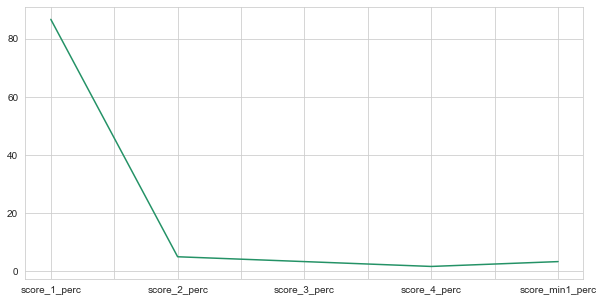

In [317]:
hmin3.describe().loc['mean'].plot(figsize=(10, 5))

In [318]:
start_time = time.time()

hmin3 = pd.DataFrame(columns=['user_id', 'score_1_perc', 'score_2_perc', 'score_3_perc', 'score_4_perc'])
for user in df['user_id'].value_counts().index[:100]:
    hmin3 = hmin3.append(hmin3_func(user), ignore_index=True)

print('Time elapsed: {}'.format((time.time() - start_time)))

hmin3

Time elapsed: 147.2524356842041


,user_id,score_1_perc,score_2_perc,score_3_perc,score_4_perc,score_min1_perc
0,294f89e27932bafefe58160c1caab293759050bddfa8dc...,100.00,0.00,0.00,0.00,0.00
1,30150792a8b3d5ee3f743f4ba729d5d363a347bafab00d...,100.00,0.00,0.00,0.00,0.00
2,bff6545811d58be844cc51de4e71136d6c8a0a2a87944f...,50.00,16.67,16.67,16.67,0.00
3,ffdf9befcb504df830c42234efbaeb9574cb4e185789b2...,83.33,0.00,16.67,0.00,0.00
4,c835c94e2261d19195e6443ddadaeb42e329b217bdc3f1...,100.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...
95,7e4ab0ece923a53ff2875022d3078dfdec252705167a1e...,83.33,16.67,0.00,0.00,0.00
96,f4cbd493619156e6648b15c18c66323539b9953de7501b...,100.00,0.00,0.00,0.00,0.00
97,7ee1ef4081a165a2a9593aaad64559c6fbceb38d2a0cb5...,100.00,0.00,0.00,0.00,0.00
98,21d689002f5d07fae0005fc00bb41e1d66fbf471200ea5...,83.33,16.67,0.00,0.00,0.00


In [320]:
hmin3.describe().loc['mean']

score_1_perc       66.8330
score_2_perc        7.1671
score_3_perc        3.3339
score_4_perc        8.5004
score_min1_perc    14.1670
Name: mean, dtype: float64

<AxesSubplot:>

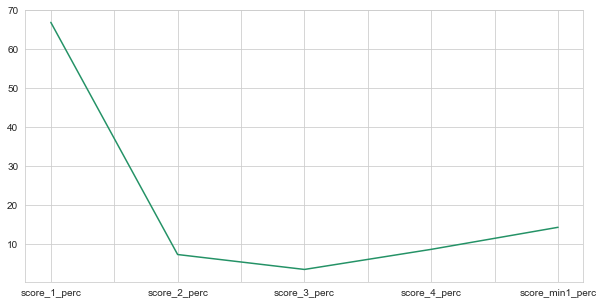

In [319]:
hmin3.describe().loc['mean'].plot(figsize=(10, 5))

In [321]:
start_time = time.time()

hmin3 = pd.DataFrame(columns=['user_id', 'score_1_perc', 'score_2_perc', 'score_3_perc', 'score_4_perc'])
for user in df['user_id'].unique():
    hmin3 = hmin3.append(hmin3_func(user), ignore_index=True)

print('Time elapsed: {}'.format((time.time() - start_time)))

Time elapsed: 1694.3563220500946


In [322]:
hmin3

,user_id,score_1_perc,score_2_perc,score_3_perc,score_4_perc,score_min1_perc
0,9e567848a7956a2092ffe217d0133711d00f1d8e1b27fa...,33.33,0.00,0.00,0.00,66.67
1,25a4becc37d479539dc4bff56aef040bd64e3c4ae94ffc...,83.33,0.00,0.00,16.67,0.00
2,0265b772483ea1d12cc79e6a0da8434090401e2d62d497...,83.33,16.67,0.00,0.00,0.00
3,7020b6cff5a59cac3393128771ba346e6b8f6f6bb437e3...,50.00,33.33,16.67,0.00,0.00
4,c4c37cb6f1157d8be24ab42e9c19c0a323ddc253811013...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1471,f25c5afac9cd2c7da838b7f6320a08f1f02f3dc993e06c...,NaN,NaN,NaN,NaN,NaN
1472,e8e6ed1fe874cc63c2a60c7fe90cb293c304a72c4d0733...,NaN,NaN,NaN,NaN,NaN
1473,b91b2de7015ddecbac8f5e0912c1ae454d5f3e2faa7a06...,0.00,0.00,0.00,0.00,100.00
1474,9472f4249610bf9aea495baf632dc16e889ea1fd7957b6...,NaN,NaN,NaN,NaN,NaN


In [323]:
hmin3.isna().sum()

user_id              0
score_1_perc       100
score_2_perc       100
score_3_perc       100
score_4_perc       100
score_min1_perc    100
dtype: int64

In [328]:
hmin3.to_csv('hmin3.csv', index=False)

In [331]:
hmin3

,user_id,score_1_perc,score_2_perc,score_3_perc,score_4_perc,score_min1_perc
0,9e567848a7956a2092ffe217d0133711d00f1d8e1b27fa...,33.33,0.00,0.00,0.00,66.67
1,25a4becc37d479539dc4bff56aef040bd64e3c4ae94ffc...,83.33,0.00,0.00,16.67,0.00
2,0265b772483ea1d12cc79e6a0da8434090401e2d62d497...,83.33,16.67,0.00,0.00,0.00
3,7020b6cff5a59cac3393128771ba346e6b8f6f6bb437e3...,50.00,33.33,16.67,0.00,0.00
4,c4c37cb6f1157d8be24ab42e9c19c0a323ddc253811013...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1471,f25c5afac9cd2c7da838b7f6320a08f1f02f3dc993e06c...,NaN,NaN,NaN,NaN,NaN
1472,e8e6ed1fe874cc63c2a60c7fe90cb293c304a72c4d0733...,NaN,NaN,NaN,NaN,NaN
1473,b91b2de7015ddecbac8f5e0912c1ae454d5f3e2faa7a06...,0.00,0.00,0.00,0.00,100.00
1474,9472f4249610bf9aea495baf632dc16e889ea1fd7957b6...,NaN,NaN,NaN,NaN,NaN


In [332]:
df3 = hmin3.copy()

In [334]:
hmin3.dropna(inplace=True)

In [335]:
hmin3.describe()

,score_1_perc,score_2_perc,score_3_perc,score_4_perc,score_min1_perc
count,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000
mean,65.114949,6.411366,2.958147,7.649193,17.867006
std,34.936214,13.206931,9.042129,18.150500,31.388154
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.330000,0.000000,0.000000,0.000000,0.000000
50%,80.000000,0.000000,0.000000,0.000000,0.000000
75%,100.000000,4.167500,0.000000,0.000000,16.670000
max,100.000000,100.000000,100.000000,100.000000,100.000000


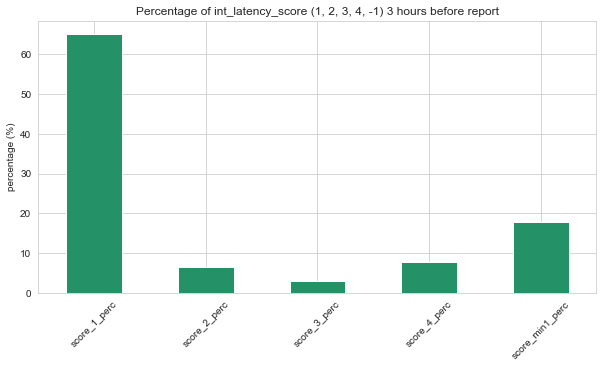

In [349]:
hmin3.describe().loc['mean'].plot(kind='bar', figsize=(10, 5))
plt.xticks(rotation=45)
plt.ylabel('percentage (%)')
plt.title('Percentage of int_latency_score (1, 2, 3, 4, -1) 3 hours before report')
plt.show();

Dapat dilihat bahwa pada 3 jam sebelum pelaporan, score 1 (int_latency) mendominasi data sebanyak 65%. Sedangkan score 4 hanya 7.6%. Apakah dengan metode ini bisa digunakan untuk memprediksi: apakah seseorang akan melapor jika terdapat score 4 di 3 jam terakhir?

In [351]:
df3 = pd.read_csv('hmin3.csv')
df3.dropna(inplace=True)
df3

,user_id,score_1_perc,score_2_perc,score_3_perc,score_4_perc,score_min1_perc
0,9e567848a7956a2092ffe217d0133711d00f1d8e1b27fa...,33.33,0.00,0.00,0.00,66.67
1,25a4becc37d479539dc4bff56aef040bd64e3c4ae94ffc...,83.33,0.00,0.00,16.67,0.00
2,0265b772483ea1d12cc79e6a0da8434090401e2d62d497...,83.33,16.67,0.00,0.00,0.00
3,7020b6cff5a59cac3393128771ba346e6b8f6f6bb437e3...,50.00,33.33,16.67,0.00,0.00
5,0dc3c3a135296fd754904773cceda0ef5534c1b28fdc39...,83.33,16.67,0.00,0.00,0.00
...,...,...,...,...,...,...
1466,a831267464a095aef0ba588e214af48c32fcd58eae7cc1...,0.00,0.00,0.00,0.00,100.00
1467,e1317baf936b621c02d1c4f67f14b627cc26eaae36ee51...,66.67,33.33,0.00,0.00,0.00
1469,4818a37c54acafaf741e80a4a27dca24592bb9dedf039c...,16.67,0.00,0.00,16.67,66.67
1470,9207daede0bdd24281c9dab56145dc1fef2b9a9758405c...,25.00,0.00,0.00,0.00,75.00


In [353]:
df3.sample(10)

,user_id,score_1_perc,score_2_perc,score_3_perc,score_4_perc,score_min1_perc
474,65d22176512ddfd49f4e3a2d74c690b082bc03e03576fe...,0.00,0.00,0.00,0.00,100.00
441,f232094f862d4c7f3985649d4ce12adc121633a387a2ee...,83.33,0.00,0.00,16.67,0.00
156,809acc0ca08a5cb7cc0146fd5c8babde79b5ad837fd417...,16.67,0.00,0.00,0.00,83.33
1116,94d06a4abe4d4ba45b8a939b3761c1df06af3c27c1b03a...,0.00,0.00,0.00,0.00,100.00
393,577e902383f73149953472201658f8c574257518dbfcc5...,100.00,0.00,0.00,0.00,0.00
1301,3ec2bb300d6e770e8d7accca5f6e9f0a22bb1aceb44519...,100.00,0.00,0.00,0.00,0.00
1139,d2d9085b5ed8403fc10a28eb3dfdd669eb4337a49e56ae...,66.67,16.67,16.67,0.00,0.00
1416,cdce85cf74c07ed96d62dfa4872e94da86d2daf36aeecd...,100.00,0.00,0.00,0.00,0.00
360,ebce8cce223c3d84924d8e5fa1f0b674ff6a1011f8092f...,0.00,0.00,0.00,0.00,100.00
1310,9521d60c3eb204f6382d1504ba594d7710532cfc935223...,83.33,16.67,0.00,0.00,0.00


In [354]:
df3['score_1_perc'].value_counts().sort_index()

0.00      131
16.67     117
20.00      10
25.00      14
33.33     107
40.00       8
50.00     141
60.00       8
66.67     140
75.00       3
80.00      13
83.33     199
100.00    485
Name: score_1_perc, dtype: int64

In [355]:
df3['score_2_perc'].value_counts().sort_index()

0.00      1032
16.67      208
20.00        4
25.00        1
33.33       95
50.00       29
66.67        1
83.33        2
100.00       4
Name: score_2_perc, dtype: int64

In [356]:
df3['score_3_perc'].value_counts().sort_index()

0.00      1189
16.67      147
20.00        4
25.00        2
33.33       24
40.00        1
50.00        5
100.00       4
Name: score_3_perc, dtype: int64

In [357]:
df3['score_4_perc'].value_counts().sort_index()

0.00      1078
16.67      139
20.00        3
25.00        3
33.33       65
40.00        2
50.00       28
60.00        1
66.67       31
83.33       18
100.00       8
Name: score_4_perc, dtype: int64

In [358]:
df3['score_min1_perc'].value_counts().sort_index()

0.00      946
16.67      89
20.00       8
25.00       3
33.33      56
40.00       7
50.00      51
60.00       5
66.67      43
75.00      14
80.00       9
83.33      76
100.00     69
Name: score_min1_perc, dtype: int64

## July 13 2021

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
sns.set_palette('summer')

In [2]:
start_time = time.time()
df = pd.read_feather('CW02_dataset.ftr')
print('Time elapsed: {}'.format((time.time() - start_time)))

Time elapsed: 21.252453327178955


In [9]:
def percentage_bin136(score_name):
    '''
    Creates subplots of percentage/proportion of score 4 and score -1 in the dataframe in 1-hour, 3-hour, and 6-hour interval before or after the reportdate.
    
    user_id: str = user id
    score_name: str = score variables in the dataframe
    
    How to call this function -> df1, df3, df6 = percentage_bin136(user_id, score_name)
    '''
    sns.set_style('whitegrid')
    sns.set_palette('summer')
    
    ## Dataframe(s)
    # 1-hour interval
    bin1 = df[['bin_1h',
           'date_time',
           'reportdate',
           'int_latency_score',
           'ext_latency_score',
           'fd_latency_score',
           'int_ploss_score',
           'ext_ploss_score',
           'ses_setup_score',
           'ser_acces_score']][(df['bin_1h'] >= -48) & (df['bin_1h'] <= 24)]
    bin1 = bin1.sort_values('bin_1h').reset_index(drop=True).drop_duplicates().drop(['date_time', 'reportdate'], axis=1)
    
    df1 = pd.DataFrame(columns=['bin_1h', 'score_4_percentage', 'score_min1_percentage'])
    df1['bin_1h'] = [i for i in range(-48, 25)]
    df1.set_index('bin_1h', inplace=True)
    for n in range(-48, 25):
        df1['score_4_percentage'].loc[n] = round(bin1[bin1['bin_1h'] == n].loc[bin1[score_name] == 4, score_name].count() / bin1[score_name][bin1['bin_1h'] == n].count() * 100, 3)
        df1['score_min1_percentage'].loc[n] = round(bin1[bin1['bin_1h'] == n].loc[bin1[score_name] == -1, score_name].count() / bin1[score_name][bin1['bin_1h'] == n].count() * 100, 3)
    
    # 3-hour interval
    bin3 = df[['bin_3h',
           'date_time',
           'reportdate',
           'int_latency_score',
           'ext_latency_score',
           'fd_latency_score',
           'int_ploss_score',
           'ext_ploss_score',
           'ses_setup_score',
           'ser_acces_score']][(df['bin_3h'] >= -16) & (df['bin_3h'] <= 8)]
    bin3 = bin3.sort_values('bin_3h').reset_index(drop=True).drop_duplicates().drop(['date_time', 'reportdate'], axis=1)
    
    df3 = pd.DataFrame(columns=['bin_3h', 'score_4_percentage', 'score_min1_percentage'])
    df3['bin_3h'] = [i for i in range(-16, 9)]
    df3.set_index('bin_3h', inplace=True)
    for n in range(-16, 9):
        df3['score_4_percentage'].loc[n] = round(bin3[bin3['bin_3h'] == n].loc[bin3[score_name] == 4, score_name].count() / bin3[score_name][bin3['bin_3h'] == n].count() * 100, 3)
        df3['score_min1_percentage'].loc[n] = round(bin3[bin3['bin_3h'] == n].loc[bin3[score_name] == -1, score_name].count() / bin3[score_name][bin3['bin_3h'] == n].count() * 100, 3)
      
    # 6-hour interval
    bin6 = df[['bin_6h',
           'date_time',
           'reportdate',
           'int_latency_score',
           'ext_latency_score',
           'fd_latency_score',
           'int_ploss_score',
           'ext_ploss_score',
           'ses_setup_score',
           'ser_acces_score']][(df['bin_6h'] >= -8) & (df['bin_6h'] <= 4)]
    bin6 = bin6.sort_values('bin_6h').reset_index(drop=True).drop_duplicates().drop(['date_time', 'reportdate'], axis=1)
    
    df6 = pd.DataFrame(columns=['bin_6h', 'score_4_percentage', 'score_min1_percentage'])
    df6['bin_6h'] = [i for i in range(-8, 5)]
    df6.set_index('bin_6h', inplace=True)
    for n in range(-8, 5):
        df6['score_4_percentage'].loc[n] = round(bin6[bin6['bin_6h'] == n].loc[bin6[score_name] == 4, score_name].count() / bin6[score_name][bin6['bin_6h'] == n].count() * 100, 3)
        df6['score_min1_percentage'].loc[n] = round(bin6[bin6['bin_6h'] == n].loc[bin6[score_name] == -1, score_name].count() / bin6[score_name][bin6['bin_6h'] == n].count() * 100, 3)
      
    
    
    ## Plot(s)
    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 10), sharey=True)
    ax[0, 0].set_ylim([-5, 25])

    # 1-hour interval
    sns.scatterplot(ax=ax[0, 0], data=df1.reset_index(), x='bin_1h', y='score_4_percentage', palette='summer') 
    ax[0, 0].set_title('{} =4 Percentage in 1-Hour Interval'.format(score_name))
    ax[0, 0].axvline(0, color='red')
    ax[0, 0].set_ylabel('')
    ax[0, 0].set_xlabel('bin_1h')
    ax[0, 0].set_xlim([-53, 29])
    ax[0, 0].set_xticks([-48, -36, -24, -12, 0, 12, 24])

    sns.scatterplot(ax=ax[0, 1], data=df1.reset_index(), x='bin_1h', y='score_min1_percentage', palette='summer')
    ax[0, 1].set_title('{} =-1 Percentage in 1-Hour Interval'.format(score_name))
    ax[0, 1].axvline(0, color='red')
    ax[0, 1].set_ylabel('')
    ax[0, 1].set_xlabel('bin_1h')
    ax[0, 1].set_xlim([-53, 29])
    ax[0, 1].set_xticks([-48, -36, -24, -12, 0, 12, 24])
    
    # 3-hour interval
    sns.scatterplot(ax=ax[1, 0], data=df3.reset_index(), x='bin_3h', y='score_4_percentage', palette='summer') 
    ax[1, 0].set_title('{} =4 Percentage in 3-Hour Interval'.format(score_name))
    ax[1, 0].axvline(0, color='red')
    ax[1, 0].set_ylabel('Percentage (%)')
    ax[1, 0].set_xlabel('bin_3h')
    ax[1, 0].set_xlim([-18, 10])
    ax[1, 0].set_xticks([-16, -8, 0, 8])

    sns.scatterplot(ax=ax[1, 1], data=df3.reset_index(), x='bin_3h', y='score_min1_percentage', palette='summer')
    ax[1, 1].set_title('{} =-1 Percentage in 3-Hour Interval'.format(score_name))
    ax[1, 1].axvline(0, color='red')
    ax[1, 1].set_ylabel('')
    ax[1, 1].set_xlabel('bin_3h')
    ax[1, 1].set_xlim([-18, 10])
    ax[1, 1].set_xticks([-16, -8, 0, 8])
    
    # 6-hour interval
    sns.scatterplot(ax=ax[2, 0], data=df6.reset_index(), x='bin_6h', y='score_4_percentage', palette='summer') 
    ax[2, 0].set_title('{} =4 Percentage in 6-Hour Interval'.format(score_name))
    ax[2, 0].axvline(0, color='red')
    ax[2, 0].set_ylabel('')
    ax[2, 0].set_xlabel('bin_6h')
    ax[2, 0].set_xlim([-10, 6])
    ax[2, 0].set_xticks([-8, -4, 0, 4])

    sns.scatterplot(ax=ax[2, 1], data=df6.reset_index(), x='bin_6h', y='score_min1_percentage', palette='summer')
    ax[2, 1].set_title('{} =-1 Percentage in 6-Hour Interval'.format(score_name))
    ax[2, 1].axvline(0, color='red')
    ax[2, 1].set_ylabel('')
    ax[2, 1].set_xlabel('bin_6h')
    ax[2, 1].set_xlim([-10, 6])
    ax[2, 1].set_xticks([-8, -4, 0, 4])
    
    fig.subplots_adjust(hspace=0.4)
    fig.show()
    
    return df1, df3, df6

Time elapsed: 4.471378326416016


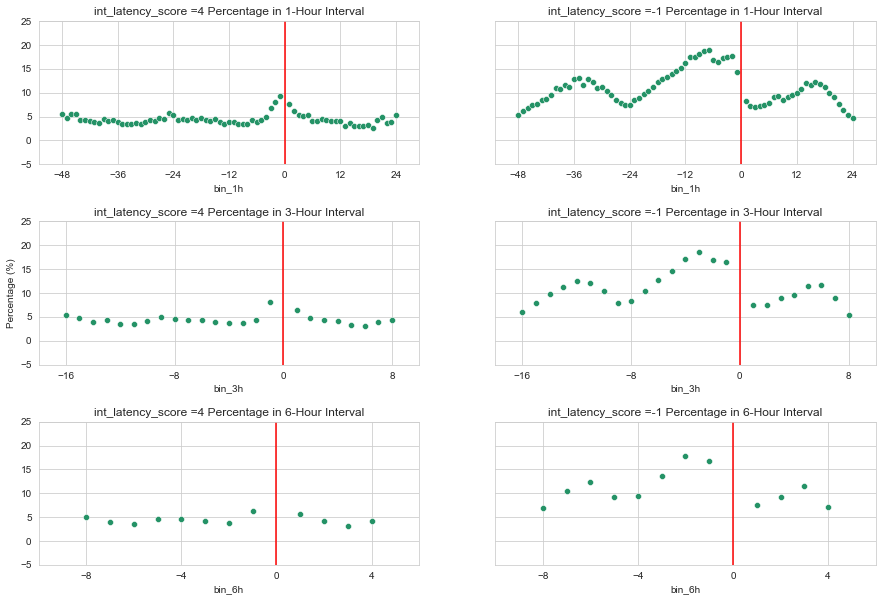

In [10]:
start_time = time.time()

df1, df3, df6 = percentage_bin136(score_name='int_latency_score')

print('Time elapsed: {}'.format((time.time() - start_time)))

In [8]:
hmin3 = pd.read_csv('hmin3.csv')
hmin3.dropna(inplace=True)
hmin3.sample(30)

,user_id,score_1_perc,score_2_perc,score_3_perc,score_4_perc,score_min1_perc
2,0265b772483ea1d12cc79e6a0da8434090401e2d62d497...,83.33,16.67,0.00,0.00,0.00
558,f98addecc6d472d18e41acc30c514aadafda11b6fb084a...,66.67,16.67,16.67,0.00,0.00
745,78ac211a05cf1684c986433d6be5896428d91f9d9dfaee...,66.67,0.00,0.00,0.00,33.33
409,a2c4bad0ae2cc453fb04505c6fb2e4571ff5804b15c68b...,83.33,16.67,0.00,0.00,0.00
1119,e1dabc7d19469546130ecfbe708b7b39ef881abd744d30...,100.00,0.00,0.00,0.00,0.00
348,85e42c7573e30d65bbe04835e14f231668de5dead96dbd...,100.00,0.00,0.00,0.00,0.00
502,db2ca7d31a2957c8fb8dc48b168e1c4e07965dd677a4c5...,100.00,0.00,0.00,0.00,0.00
398,ae24be231e499361ff2b2820044bc12911fea0ebc3e849...,50.00,0.00,0.00,0.00,50.00
100,4486f53be75a999cc2dacce389d6dacc59ff2220cfb459...,100.00,0.00,0.00,0.00,0.00
1090,d92e00ff52bc86645ee09cb2e4e8cf861b2f0255ea44e0...,83.33,0.00,0.00,0.00,16.67


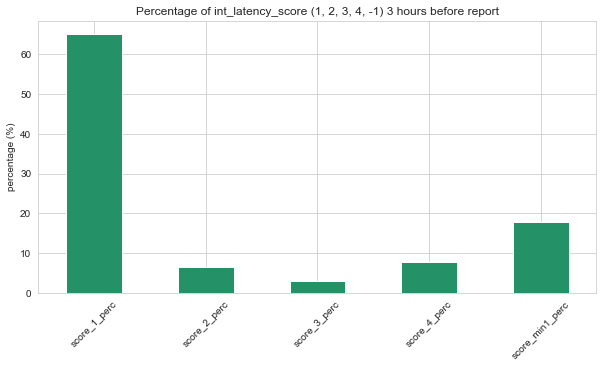

In [6]:
hmin3.describe().loc['mean'].plot(kind='bar', figsize=(10, 5))
plt.xticks(rotation=45)
plt.ylabel('percentage (%)')
plt.title('Percentage of int_latency_score (1, 2, 3, 4, -1) 3 hours before report')
plt.show();

Dapat dilihat bahwa pada 3 jam sebelum pelaporan, score 1 (int_latency) mendominasi data sebanyak 65%. Sedangkan score 4 hanya 7.6%. Apakah dengan metode ini bisa digunakan untuk memprediksi: apakah seseorang akan melapor jika terdapat score 4 di 3 jam terakhir?

In [61]:
def percentage_bin136(score_name):
    '''
    Creates subplots of percentage/proportion of score 4 and score -1 in the dataframe in 1-hour, 3-hour, and 6-hour interval before or after the reportdate.
    
    user_id: str = user id
    score_name: str = score variables in the dataframe
    
    How to call this function -> df1, df3, df6 = percentage_bin136(user_id, score_name)
    '''
    sns.set_style('whitegrid')
    sns.set_palette('summer')
    
    ## Dataframe(s)
    # 1-hour interval
    bin1 = df[['bin_1h',
           'date_time',
           'reportdate',
           'int_latency_score',
           'ext_latency_score',
           'fd_latency_score',
           'int_ploss_score',
           'ext_ploss_score',
           'ses_setup_score',
           'ser_acces_score']][(df['bin_1h'] >= -48) & (df['bin_1h'] <= 24)]
    bin1 = bin1.sort_values('bin_1h').reset_index(drop=True).drop_duplicates().drop(['date_time', 'reportdate'], axis=1)
    
    df1 = pd.DataFrame(columns=['bin_1h', 'score_1_percentage', 'score_2_percentage', 'score_3_percentage', 'score_4_percentage', 'score_min1_percentage'])
    df1['bin_1h'] = [i for i in range(-48, 25)]
    df1.set_index('bin_1h', inplace=True)
    for n in range(-48, 25):
        df1['score_1_percentage'].loc[n] = round(bin1[bin1['bin_1h'] == n].loc[bin1[score_name] == 1, score_name].count() / bin1[score_name][bin1['bin_1h'] == n].count() * 100, 3)
        df1['score_2_percentage'].loc[n] = round(bin1[bin1['bin_1h'] == n].loc[bin1[score_name] == 2, score_name].count() / bin1[score_name][bin1['bin_1h'] == n].count() * 100, 3)
        df1['score_3_percentage'].loc[n] = round(bin1[bin1['bin_1h'] == n].loc[bin1[score_name] == 3, score_name].count() / bin1[score_name][bin1['bin_1h'] == n].count() * 100, 3)
        df1['score_4_percentage'].loc[n] = round(bin1[bin1['bin_1h'] == n].loc[bin1[score_name] == 4, score_name].count() / bin1[score_name][bin1['bin_1h'] == n].count() * 100, 3)
        df1['score_min1_percentage'].loc[n] = round(bin1[bin1['bin_1h'] == n].loc[bin1[score_name] == -1, score_name].count() / bin1[score_name][bin1['bin_1h'] == n].count() * 100, 3)
    
    
    ## Plot(s)
    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 10), sharey=True)
#     ax[0, 0].set_ylim([-5, 25])

    # 1-hour interval
    sns.scatterplot(ax=ax[0, 0], data=df1.reset_index(), x='bin_1h', y='score_1_percentage', palette='summer') 
    ax[0, 0].set_title('{} =1 Percentage in 1-Hour Interval'.format(score_name))
    ax[0, 0].axvline(0, color='red')
    ax[0, 0].set_ylabel('')
    ax[0, 0].set_xlabel('bin_1h')
    ax[0, 0].set_xlim([-53, 29])
    ax[0, 0].set_xticks([-48, -36, -24, -12, 0, 12, 24])
    
    sns.scatterplot(ax=ax[0, 1], data=df1.reset_index(), x='bin_1h', y='score_2_percentage', palette='summer') 
    ax[0, 1].set_title('{} =2 Percentage in 1-Hour Interval'.format(score_name))
    ax[0, 1].axvline(0, color='red')
    ax[0, 1].set_ylabel('')
    ax[0, 1].set_xlabel('bin_1h')
    ax[0, 1].set_xlim([-53, 29])
    ax[0, 1].set_xticks([-48, -36, -24, -12, 0, 12, 24])
    
    sns.scatterplot(ax=ax[1, 0], data=df1.reset_index(), x='bin_1h', y='score_3_percentage', palette='summer') 
    ax[1, 0].set_title('{} =3 Percentage in 1-Hour Interval'.format(score_name))
    ax[1, 0].axvline(0, color='red')
    ax[1, 0].set_ylabel('')
    ax[1, 0].set_xlabel('bin_1h')
    ax[1, 0].set_xlim([-53, 29])
    ax[1, 0].set_xticks([-48, -36, -24, -12, 0, 12, 24])
    
    sns.scatterplot(ax=ax[1, 1], data=df1.reset_index(), x='bin_1h', y='score_4_percentage', palette='summer') 
    ax[1, 1].set_title('{} =4 Percentage in 1-Hour Interval'.format(score_name))
    ax[1, 1].axvline(0, color='red')
    ax[1, 1].set_ylabel('')
    ax[1, 1].set_xlabel('bin_1h')
    ax[1, 1].set_xlim([-53, 29])
    ax[1, 1].set_xticks([-48, -36, -24, -12, 0, 12, 24])

    sns.scatterplot(ax=ax[2, 0], data=df1.reset_index(), x='bin_1h', y='score_min1_percentage', palette='summer')
    ax[2, 0].set_title('{} =-1 Percentage in 1-Hour Interval'.format(score_name))
    ax[2, 0].axvline(0, color='red')
    ax[2, 0].set_ylabel('')
    ax[2, 0].set_xlabel('bin_1h')
    ax[2, 0].set_xlim([-53, 29])
    ax[2, 0].set_xticks([-48, -36, -24, -12, 0, 12, 24])
    
    plt.tight_layout()
    
    return df1

Time elapsed: 4.045188903808594


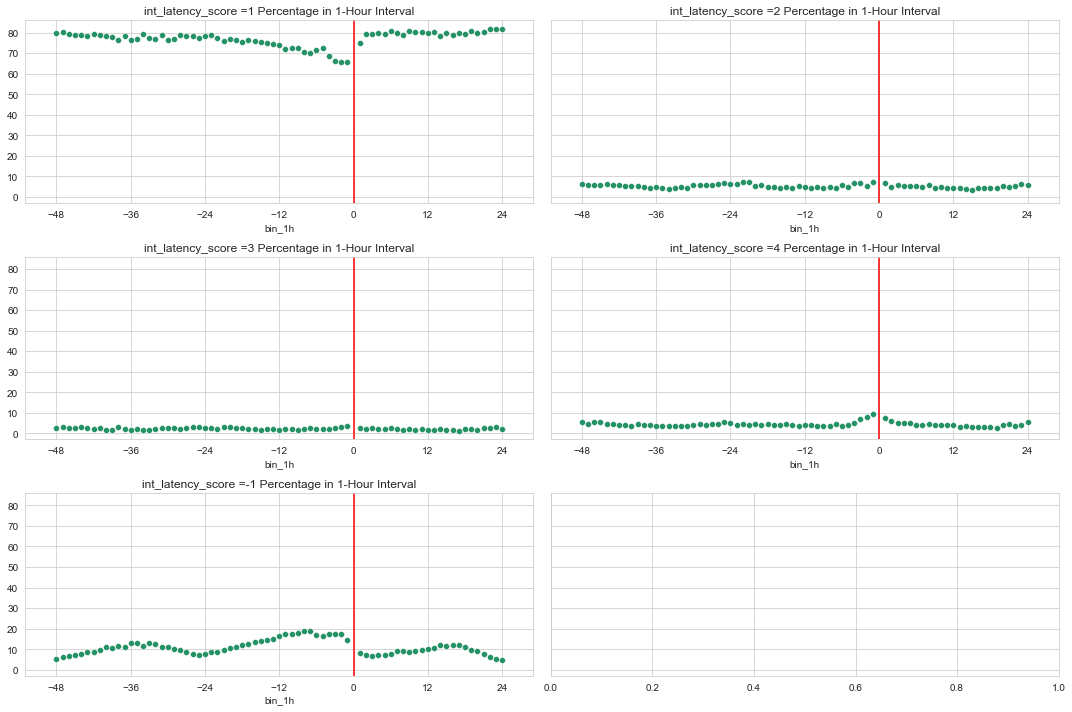

In [62]:
start_time = time.time()

df1 = percentage_bin136(score_name='int_latency_score')

print('Time elapsed: {}'.format((time.time() - start_time)))

In [56]:
df1

,score_1_percentage,score_2_percentage,score_3_percentage,score_4_percentage,score_min1_percentage
bin_1h,,,,,
-48,79.717,6.475,2.873,5.617,5.317
-47,80.069,6.044,2.915,4.715,6.258
-46,79.441,5.763,2.495,5.591,6.71
-45,78.827,5.735,2.458,5.606,7.374
-44,78.661,6.263,3.11,4.363,7.603
...,...,...,...,...,...
20,79.752,5.135,1.739,4.224,9.151
21,80.115,5.023,2.429,4.817,7.616
22,81.859,5.585,2.487,3.628,6.441


## July 14 2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
start_time = time.time()
df = pd.read_feather('CW02_dataset.ftr')
print('Time elapsed: {}'.format((time.time() - start_time)))

Time elapsed: 10.599186897277832


In [3]:
df

,user_id,date_time,reportdate,reg,cwitel,speed_id,lcat,device_count,apps_count,avg_activity_sec,...,ext_latency_score,fd_latency_score,int_ploss_score,ext_ploss_score,ses_setup_score,ser_acces_score,bin_1h,bin_3h,bin_6h,bin_24h
0,9e567848a7956a2092ffe217d0133711d00f1d8e1b27fa...,2021-04-01 00:00:00,2021-04-01 17:33:10,1,2,20M,Residensial,1,5,74.000000,...,-1,-1,4,1,1,1,-18.0,-6.0,-3.0,-1.0
1,25a4becc37d479539dc4bff56aef040bd64e3c4ae94ffc...,2021-04-01 00:30:00,2021-04-08 12:03:57,1,2,100M,Residensial,4,34,494.222222,...,1,4,2,1,2,4,-180.0,-60.0,-30.0,-8.0
2,0265b772483ea1d12cc79e6a0da8434090401e2d62d497...,2021-04-01 02:00:00,2021-04-07 12:27:02,1,2,20M,Residensial,3,27,291.071429,...,1,1,2,1,1,2,-155.0,-52.0,-26.0,-7.0
3,7020b6cff5a59cac3393128771ba346e6b8f6f6bb437e3...,2021-04-01 02:00:00,2021-04-10 21:41:48,1,2,20M,Residensial,1,7,88.571429,...,-1,-1,1,1,1,1,-236.0,-79.0,-40.0,-10.0
4,c4c37cb6f1157d8be24ab42e9c19c0a323ddc253811013...,2021-04-01 02:00:00,2021-04-02 14:14:31,1,2,20M,Residensial,1,26,643.793103,...,1,1,1,1,1,4,-37.0,-13.0,-7.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349550,ce232d4d9532ddcab9b337389208d2b1e2a4a6aa754ff7...,2021-04-30 21:00:00,2021-04-17 21:48:17,1,2,20M,Residensial,1,27,207.241379,...,1,2,1,1,1,2,312.0,104.0,52.0,13.0
1349551,c7f46b2d4b773beb8b97f95728ad6fc34f2d13ca1dc8a0...,2021-04-30 21:30:00,2021-04-24 21:53:25,1,2,30M,Residensial,1,32,396.285714,...,1,1,1,1,1,3,144.0,48.0,24.0,6.0
1349552,df8b44a6e59e404379d28a7d69fd153da700d201144429...,2021-04-30 21:30:00,2021-04-21 22:00:07,1,2,20M,Residensial,8,80,426.000000,...,1,2,1,1,1,2,216.0,72.0,36.0,9.0
1349553,56d65a18a5a423bc13b602b2decff6321cc12a5529ffa5...,2021-04-30 22:00:00,2021-04-21 08:44:37,1,2,10M,Residensial,3,41,566.603774,...,1,1,2,1,1,2,230.0,77.0,39.0,10.0


In [4]:
df[df['bin_3h'] == -1]

,user_id,date_time,reportdate,reg,cwitel,speed_id,lcat,device_count,apps_count,avg_activity_sec,...,ext_latency_score,fd_latency_score,int_ploss_score,ext_ploss_score,ses_setup_score,ser_acces_score,bin_1h,bin_3h,bin_6h,bin_24h
109,ca5659ed031ca58eb1a144d7e002495823e659d661e134...,2021-04-04 08:30:00,2021-04-04 11:01:15,1,2,20M,Residensial,3,44,270.555556,...,1,4,1,1,1,2,-3.0,-1.0,-1.0,-1.0
177,b6326aa7f529828c0ffa03a87c7e74dd22b5c721d64523...,2021-04-06 08:00:00,2021-04-06 09:48:31,1,2,20M,Residensial,2,38,221.136364,...,1,2,2,1,1,2,-2.0,-1.0,-1.0,-1.0
214,a7b6601794b4fde5cbd6919909eab4e62bfc6454ad287e...,2021-04-07 08:30:00,2021-04-07 10:02:14,1,2,20M,Residensial,1,21,440.454545,...,1,4,2,2,1,1,-2.0,-1.0,-1.0,-1.0
848,f6717de2e16cdff161ba1909da883a6fb2979a76d65fd9...,2021-04-18 20:00:00,2021-04-18 20:25:55,1,2,20M,Residensial,1,10,52.142857,...,-1,-1,2,1,3,4,-1.0,-1.0,-1.0,-1.0
852,219d608d1d1a82474f3193a140224331b01ffe5844e080...,2021-04-18 21:00:00,2021-04-18 23:10:05,1,2,20M,Residensial,4,58,483.538462,...,1,4,1,1,1,3,-3.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348910,afaf2094b2a75304063f7e64221cc225d8476f46b44ccd...,2021-04-16 10:30:00,2021-04-16 10:48:37,1,2,30M,Residensial,9,105,237.699115,...,1,2,1,1,1,2,-1.0,-1.0,-1.0,-1.0
1349033,f1180d1c55bc9e9c3cf9606549775e5f4c4acab5b28101...,2021-04-18 11:30:00,2021-04-18 12:06:41,1,2,20M,Residensial,1,3,773.333333,...,-1,-1,2,1,1,1,-1.0,-1.0,-1.0,-1.0
1349090,5fe76fb4e076e1b583771ad44fbc064c24348c399d5006...,2021-04-19 12:00:00,2021-04-19 12:21:59,1,2,30M,Residensial,1,48,197.017544,...,1,3,1,4,1,1,-1.0,-1.0,-1.0,-1.0
1349508,5dbe646c75df99a68ba8bef3fae458d6d1ad0ea8c96c8a...,2021-04-29 13:30:00,2021-04-29 14:28:30,1,2,30M,Residensial,3,67,416.493506,...,1,2,1,1,1,3,-1.0,-1.0,-1.0,-1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349555 entries, 0 to 1349554
Data columns (total 34 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   user_id                      1349555 non-null  object        
 1   date_time                    1349555 non-null  datetime64[ns]
 2   reportdate                   1349555 non-null  object        
 3   reg                          1349555 non-null  object        
 4   cwitel                       1349555 non-null  object        
 5   speed_id                     1349555 non-null  object        
 6   lcat                         1349555 non-null  object        
 7   device_count                 1349555 non-null  int64         
 8   apps_count                   1349555 non-null  int64         
 9   avg_activity_sec             1349555 non-null  float64       
 10  avg_volume_in                1349555 non-null  float64       
 11  avg_volume_

In [6]:
df[['date_time', 'reportdate', 'int_latency_score', 'int_ploss_score']][df['bin_3h'] == -1].drop_duplicates()

,date_time,reportdate,int_latency_score,int_ploss_score
109,2021-04-04 08:30:00,2021-04-04 11:01:15,1,1
177,2021-04-06 08:00:00,2021-04-06 09:48:31,1,2
214,2021-04-07 08:30:00,2021-04-07 10:02:14,1,2
848,2021-04-18 20:00:00,2021-04-18 20:25:55,1,2
852,2021-04-18 21:00:00,2021-04-18 23:10:05,1,1
...,...,...,...,...
1348910,2021-04-16 10:30:00,2021-04-16 10:48:37,1,1
1349033,2021-04-18 11:30:00,2021-04-18 12:06:41,1,2
1349090,2021-04-19 12:00:00,2021-04-19 12:21:59,1,1
1349508,2021-04-29 13:30:00,2021-04-29 14:28:30,3,1


In [7]:
df[['user_id', 'date_time', 'reportdate', 'int_latency_score', 'bin_1h']][
    (df['bin_1h'] >= -48) &
    (df['bin_1h'] < 0)].drop_duplicates().sample(100000)

,user_id,date_time,reportdate,int_latency_score,bin_1h
1117853,d4d0642e8a05bb1579b91c6d9ec7a663b1bb6d7ac5fc1b...,2021-04-27 15:30:00,2021-04-28 08:15:07,1,-17.0
21687,577e902383f73149953472201658f8c574257518dbfcc5...,2021-04-08 04:30:00,2021-04-08 13:19:56,1,-9.0
344902,4fdaf1832789af56b78a76fe06cce6c9d6ed8f7bbc1048...,2021-04-24 11:30:00,2021-04-25 16:25:27,1,-29.0
845043,232d800957bd48ed821adf5b2417a7cb8369032bce7945...,2021-04-06 08:30:00,2021-04-06 15:45:28,1,-8.0
650901,47d5d00f4175da0919eb6253178911912414547f0f1a2b...,2021-04-19 12:00:00,2021-04-19 14:45:02,1,-3.0
...,...,...,...,...,...
186626,3cb7817bfb7a6d0049d16ab2bc04009018cb31fa0e1c5d...,2021-04-11 23:30:00,2021-04-13 19:09:23,1,-44.0
1095944,e78dcd773a8e2c958ebc85fded9e77b579c78cc5c877e8...,2021-04-19 15:30:00,2021-04-21 13:07:24,-1,-46.0
206401,c37158ef18a06e954212967d380805381a59ea253d089c...,2021-04-06 22:00:00,2021-04-08 11:48:48,-1,-38.0
1031228,2a17cf2513a2dde75e0a7a624c3925725dc4d1865302cd...,2021-04-03 15:30:00,2021-04-03 19:46:26,2,-5.0


In [8]:
df[['user_id', 'date_time', 'reportdate', 'int_latency_score', 'bin_1h']][
    (df['bin_1h'] < -48) |
    (df['bin_1h'] > 48)].drop_duplicates().sample(112422)

,user_id,date_time,reportdate,int_latency_score,bin_1h
912420,14b2d99290788c438c269441f067becc6bff5d4c51540b...,2021-04-21 04:00:00,2021-04-15 15:27:22,1,133.0
184805,64bd22a73a18ac97ed9cf386150e5c31b278d42ba47fd1...,2021-04-30 23:00:00,2021-04-24 13:02:33,1,154.0
1179058,207b760eac64f9f5d93c6b91f6286da350994459be8569...,2021-04-16 14:00:00,2021-04-30 12:01:51,1,-335.0
994645,5db97dcda4f7b79b066f64bf1c1bcf3185cb4981cf1d40...,2021-04-23 17:30:00,2021-04-27 11:40:31,1,-91.0
1021532,7a473a0c1059fa3d198847764e77fff0470067c5947078...,2021-04-25 22:30:00,2021-04-20 08:52:39,-1,134.0
...,...,...,...,...,...
426333,95203728aa485a08498189cf6e2d457f38f55a317879fe...,2021-04-24 12:30:00,2021-04-18 19:57:09,1,137.0
14834,1c6785cc29c80b82d335748cad7d3219559d33bc5d42e9...,2021-04-03 12:00:00,2021-04-09 14:00:37,1,-147.0
1037642,b8ccfd069bf82a099eb7d7801ca372042a7c264fb71a6e...,2021-04-26 05:30:00,2021-04-19 09:54:52,1,164.0
401867,546a34439462422fa80ae0181507e6dba2f32272bf8532...,2021-04-11 19:30:00,2021-04-24 11:12:03,1,-304.0


In [9]:
df[df['user_id'] == 'bff6545811d58be844cc51de4e71136d6c8a0a2a87944f7ba0dfe0423b548894']

,user_id,date_time,reportdate,reg,cwitel,speed_id,lcat,device_count,apps_count,avg_activity_sec,...,ext_latency_score,fd_latency_score,int_ploss_score,ext_ploss_score,ses_setup_score,ser_acces_score,bin_1h,bin_3h,bin_6h,bin_24h
318,bff6545811d58be844cc51de4e71136d6c8a0a2a87944f...,2021-04-09 16:00:00,2021-04-15 22:57:02,1,2,20M,Residensial,2,36,430.930233,...,1,1,1,1,1,2,-151.0,-51.0,-26.0,-7.0
3792,bff6545811d58be844cc51de4e71136d6c8a0a2a87944f...,2021-04-23 17:00:00,2021-04-15 22:57:02,1,2,20M,Residensial,4,53,313.275862,...,1,2,1,1,1,2,187.0,63.0,32.0,8.0
5347,bff6545811d58be844cc51de4e71136d6c8a0a2a87944f...,2021-04-29 23:00:00,2021-04-15 22:57:02,1,2,20M,Residensial,2,38,578.205128,...,1,1,2,2,1,2,337.0,113.0,57.0,15.0
5439,bff6545811d58be844cc51de4e71136d6c8a0a2a87944f...,2021-04-03 03:00:00,2021-04-15 22:57:02,1,2,20M,Residensial,2,12,153.846154,...,-1,1,1,1,1,2,-308.0,-103.0,-52.0,-13.0
5499,bff6545811d58be844cc51de4e71136d6c8a0a2a87944f...,2021-04-05 01:00:00,2021-04-15 22:57:02,1,2,20M,Residensial,2,19,299.090909,...,1,2,1,1,1,2,-262.0,-88.0,-44.0,-11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342911,bff6545811d58be844cc51de4e71136d6c8a0a2a87944f...,2021-04-30 12:30:00,2021-04-15 22:57:02,1,2,20M,Residensial,2,42,622.173913,...,2,2,1,1,1,2,350.0,117.0,59.0,15.0
1344229,bff6545811d58be844cc51de4e71136d6c8a0a2a87944f...,2021-04-29 17:00:00,2021-04-15 22:57:02,1,2,20M,Residensial,4,49,491.785714,...,1,1,1,1,1,2,331.0,111.0,56.0,14.0
1345754,bff6545811d58be844cc51de4e71136d6c8a0a2a87944f...,2021-04-07 05:30:00,2021-04-15 22:57:02,1,2,20M,Residensial,1,18,292.777778,...,1,4,2,2,1,2,-210.0,-70.0,-35.0,-9.0
1346989,bff6545811d58be844cc51de4e71136d6c8a0a2a87944f...,2021-04-03 13:00:00,2021-04-15 22:57:02,1,2,20M,Residensial,3,44,298.269231,...,1,4,1,1,1,2,-298.0,-100.0,-50.0,-13.0


In [10]:
cols = ['user_id',
        'date_time',
        'reportdate',
        'bin_1h',
        'int_latency_score',
        'ext_latency_score',
        'fd_latency_score',
        'int_ploss_score',
        'ext_ploss_score',
        'ses_setup_score',
        'ser_acces_score']

report1 = df[cols][(df['bin_1h'] >= -48) & (df['bin_1h'] < 0)].drop_duplicates().sample(100000)
report0 = df[cols][(df['bin_1h'] < -48) | (df['bin_1h'] > 0)].drop_duplicates().sample(100000)

In [11]:
report1.drop('user_id', axis=1, inplace=True)
report0.drop('user_id', axis=1, inplace=True)

report1['report_0_1'] = 1
report0['report_0_1'] = 0

In [12]:
report1.head()

,date_time,reportdate,bin_1h,int_latency_score,ext_latency_score,fd_latency_score,int_ploss_score,ext_ploss_score,ses_setup_score,ser_acces_score,report_0_1
966730,2021-04-07 00:30:00,2021-04-07 08:18:08,-8.0,-1,-1,-1,-1,3,1,1,1
888995,2021-04-04 13:30:00,2021-04-05 15:32:36,-27.0,4,1,4,1,1,1,3,1
256536,2021-04-19 23:30:00,2021-04-20 09:46:46,-11.0,1,1,2,1,1,1,2,1
117145,2021-04-17 15:30:00,2021-04-19 11:16:48,-44.0,1,1,1,1,1,1,2,1
501210,2021-04-19 21:00:00,2021-04-20 12:18:08,-16.0,-1,-1,-1,1,1,1,1,1


In [13]:
report0.head()

,date_time,reportdate,bin_1h,int_latency_score,ext_latency_score,fd_latency_score,int_ploss_score,ext_ploss_score,ses_setup_score,ser_acces_score,report_0_1
1161503,2021-04-13 07:00:00,2021-04-24 18:14:54,-276.0,1,1,4,2,1,1,2,0
25113,2021-04-20 19:30:00,2021-04-29 21:06:02,-218.0,1,1,2,1,1,1,2,0
810202,2021-04-27 23:00:00,2021-04-18 22:15:16,217.0,1,1,2,1,1,1,2,0
911723,2021-04-06 22:00:00,2021-04-09 18:04:01,-69.0,2,1,3,1,1,1,3,0
503194,2021-04-06 15:00:00,2021-04-06 10:31:55,5.0,1,1,3,1,1,1,2,0


* report_0_1 = 1 ---> in 48 hours or less, this user will make a report
* report_0_1 = 0 ---> in 48 hours or less, this user will not make a report (yet)

In [14]:
df_report48 = pd.concat([report1, report0])

In [15]:
df_report48

,date_time,reportdate,bin_1h,int_latency_score,ext_latency_score,fd_latency_score,int_ploss_score,ext_ploss_score,ses_setup_score,ser_acces_score,report_0_1
966730,2021-04-07 00:30:00,2021-04-07 08:18:08,-8.0,-1,-1,-1,-1,3,1,1,1
888995,2021-04-04 13:30:00,2021-04-05 15:32:36,-27.0,4,1,4,1,1,1,3,1
256536,2021-04-19 23:30:00,2021-04-20 09:46:46,-11.0,1,1,2,1,1,1,2,1
117145,2021-04-17 15:30:00,2021-04-19 11:16:48,-44.0,1,1,1,1,1,1,2,1
501210,2021-04-19 21:00:00,2021-04-20 12:18:08,-16.0,-1,-1,-1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
431395,2021-04-18 16:00:00,2021-04-18 14:17:59,2.0,1,1,1,1,1,1,2,0
1298205,2021-04-18 23:00:00,2021-04-11 21:48:49,170.0,2,1,3,1,1,1,2,0
682341,2021-04-06 18:30:00,2021-04-17 08:42:18,-255.0,1,1,4,2,1,1,3,0
1036458,2021-04-29 17:00:00,2021-04-18 17:01:58,264.0,1,1,2,1,1,1,3,0


In [16]:
df_report48[(df_report48['report_0_1'] == 1) &
            (df_report48['int_latency_score'] == 1)]

,date_time,reportdate,bin_1h,int_latency_score,ext_latency_score,fd_latency_score,int_ploss_score,ext_ploss_score,ses_setup_score,ser_acces_score,report_0_1
256536,2021-04-19 23:30:00,2021-04-20 09:46:46,-11.0,1,1,2,1,1,1,2,1
117145,2021-04-17 15:30:00,2021-04-19 11:16:48,-44.0,1,1,1,1,1,1,2,1
1196422,2021-04-16 22:00:00,2021-04-17 08:42:18,-11.0,1,1,2,2,1,1,2,1
681934,2021-04-25 14:00:00,2021-04-26 10:26:44,-21.0,1,1,1,1,1,1,2,1
260730,2021-04-25 02:00:00,2021-04-26 21:03:56,-44.0,1,1,1,2,1,3,4,1
...,...,...,...,...,...,...,...,...,...,...,...
720877,2021-04-02 13:30:00,2021-04-02 14:38:52,-2.0,1,1,4,1,2,1,2,1
192696,2021-04-26 15:30:00,2021-04-27 18:09:25,-27.0,1,1,1,1,1,1,2,1
428146,2021-04-07 15:30:00,2021-04-08 11:44:17,-21.0,1,1,1,1,1,1,1,1
1193888,2021-04-20 13:00:00,2021-04-21 14:56:40,-26.0,1,1,2,2,1,1,3,1


In [17]:
cols_plot = ['score1_count', 'score2_count', 'score3_count', 'score4_count', 'scoremin1_count', 'report_0_1']

# int_latency_score
df_plot = pd.DataFrame(columns=cols_plot)
df_plot['report_0_1'] = [0, 1]

In [18]:
df_plot['score1_count'][df_plot['report_0_1'] == 0] = df_report48[(df_report48['report_0_1'] == 0) & (df_report48['int_latency_score'] == 1)].shape[0]

In [19]:
df_report48[(df_report48['report_0_1'] == 0) &
            (df_report48['int_latency_score'] == 1)].shape[0]

81057

In [20]:
df_plot

,score1_count,score2_count,score3_count,score4_count,scoremin1_count,report_0_1
0,81057,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,NaN,1


In [21]:
df_plot['score1_count'][df_plot['report_0_1'] == 1] = df_report48[(df_report48['report_0_1'] == 1) & (df_report48['int_latency_score'] == 1)].shape[0]

In [22]:
df_report48[(df_report48['report_0_1'] == 1) &
            (df_report48['int_latency_score'] == 1)].shape[0]

75590

In [23]:
df_plot

,score1_count,score2_count,score3_count,score4_count,scoremin1_count,report_0_1
0,81057,NaN,NaN,NaN,NaN,0
1,75590,NaN,NaN,NaN,NaN,1


In [24]:
df_plot['score2_count'][df_plot['report_0_1'] == 0] = df_report48[(df_report48['report_0_1'] == 0) & (df_report48['int_latency_score'] == 2)].shape[0]
df_plot['score2_count'][df_plot['report_0_1'] == 1] = df_report48[(df_report48['report_0_1'] == 1) & (df_report48['int_latency_score'] == 2)].shape[0]

In [25]:
df_plot

,score1_count,score2_count,score3_count,score4_count,scoremin1_count,report_0_1
0,81057,5166,NaN,NaN,NaN,0
1,75590,5471,NaN,NaN,NaN,1


In [26]:
df_plot['score3_count'][df_plot['report_0_1'] == 0] = df_report48[(df_report48['report_0_1'] == 0) & (df_report48['int_latency_score'] == 3)].shape[0]
df_plot['score3_count'][df_plot['report_0_1'] == 1] = df_report48[(df_report48['report_0_1'] == 1) & (df_report48['int_latency_score'] == 3)].shape[0]

In [27]:
df_plot

,score1_count,score2_count,score3_count,score4_count,scoremin1_count,report_0_1
0,81057,5166,2143,NaN,NaN,0
1,75590,5471,2335,NaN,NaN,1


In [28]:
df_plot['score4_count'][df_plot['report_0_1'] == 0] = df_report48[(df_report48['report_0_1'] == 0) & (df_report48['int_latency_score'] == 4)].shape[0]
df_plot['score4_count'][df_plot['report_0_1'] == 1] = df_report48[(df_report48['report_0_1'] == 1) & (df_report48['int_latency_score'] == 4)].shape[0]

In [29]:
df_plot['scoremin1_count'][df_plot['report_0_1'] == 0] = df_report48[(df_report48['report_0_1'] == 0) & (df_report48['int_latency_score'] == -1)].shape[0]
df_plot['scoremin1_count'][df_plot['report_0_1'] == 1] = df_report48[(df_report48['report_0_1'] == 1) & (df_report48['int_latency_score'] == -1)].shape[0]

In [30]:
df_plot

,score1_count,score2_count,score3_count,score4_count,scoremin1_count,report_0_1
0,81057,5166,2143,3876,7758,0
1,75590,5471,2335,4486,12118,1


<AxesSubplot:xlabel='report_0_1', ylabel='score1_count'>

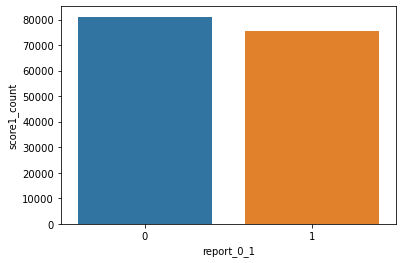

In [31]:
sns.barplot(data=df_plot, x='report_0_1', y='score1_count')

In [32]:
df_plot2 = df_plot.copy()

In [33]:
df_plot2

,score1_count,score2_count,score3_count,score4_count,scoremin1_count,report_0_1
0,81057,5166,2143,3876,7758,0
1,75590,5471,2335,4486,12118,1


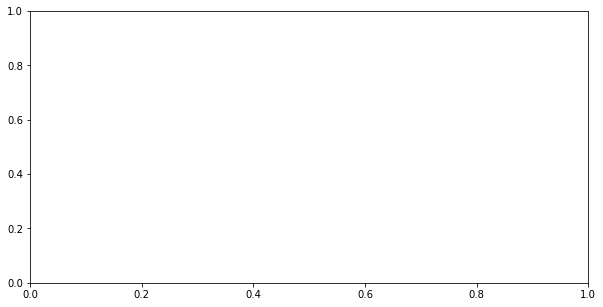

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
# ax.bar(x=df_plot['report_0_1'], height=df_plot['score1_count'])
# ax.bar(x=df_plot['report_0_1'], height=df_plot['score2_count'])
# ax.bar(x=df_plot['report_0_1'], height=df_plot['score3_count'])
# ax.bar(x=df_plot['report_0_1'], height=df_plot['score4_count'])

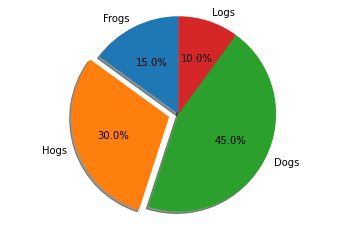

In [35]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

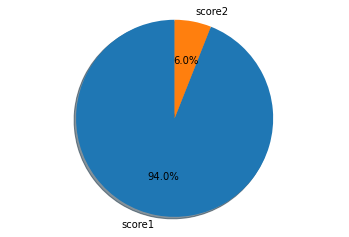

In [36]:
labels = 'score1', 'score2'
sizes = [round((df_plot['score1_count'][df_plot['report_0_1'] == 0].values / 1000).astype(float)[0], 2),
         round((df_plot['score2_count'][df_plot['report_0_1'] == 0].values / 1000).astype(float)[0], 2)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [37]:
round((df_plot['score1_count'][df_plot['report_0_1'] == 0].values / 1000).astype(float)[0], 2)

81.06

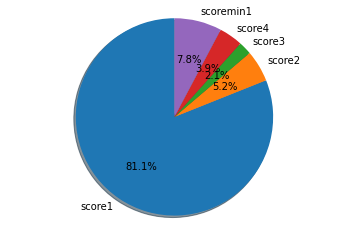

In [38]:
labels = 'score1', 'score2', 'score3', 'score4', 'scoremin1'
sizes = [round((df_plot['score1_count'][df_plot['report_0_1'] == 0].values / 1000).astype(float)[0], 2),
         round((df_plot['score2_count'][df_plot['report_0_1'] == 0].values / 1000).astype(float)[0], 2),
         round((df_plot['score3_count'][df_plot['report_0_1'] == 0].values / 1000).astype(float)[0], 2),
         round((df_plot['score4_count'][df_plot['report_0_1'] == 0].values / 1000).astype(float)[0], 2),
         round((df_plot['scoremin1_count'][df_plot['report_0_1'] == 0].values / 1000).astype(float)[0], 2)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

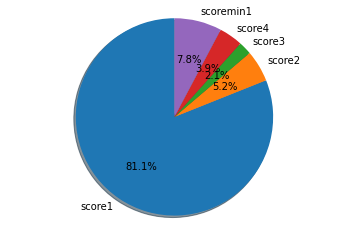

In [39]:
labels = 'score1', 'score2', 'score3', 'score4', 'scoremin1'
sizes = [round((df_plot['score1_count'][df_plot['report_0_1'] == 0].values / 1000).astype(float)[0], 2),
         round((df_plot['score2_count'][df_plot['report_0_1'] == 0].values / 1000).astype(float)[0], 2),
         round((df_plot['score3_count'][df_plot['report_0_1'] == 0].values / 1000).astype(float)[0], 2),
         round((df_plot['score4_count'][df_plot['report_0_1'] == 0].values / 1000).astype(float)[0], 2),
         round((df_plot['scoremin1_count'][df_plot['report_0_1'] == 0].values / 1000).astype(float)[0], 2)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [40]:
cols = ['name', 'score1', 'score2', 'score3', 'score4', 'scoremin1', 'report']
df1 = pd.DataFrame(columns=cols)

In [41]:
df1

,name,score1,score2,score3,score4,scoremin1,report


In [42]:
df_report48

,date_time,reportdate,bin_1h,int_latency_score,ext_latency_score,fd_latency_score,int_ploss_score,ext_ploss_score,ses_setup_score,ser_acces_score,report_0_1
966730,2021-04-07 00:30:00,2021-04-07 08:18:08,-8.0,-1,-1,-1,-1,3,1,1,1
888995,2021-04-04 13:30:00,2021-04-05 15:32:36,-27.0,4,1,4,1,1,1,3,1
256536,2021-04-19 23:30:00,2021-04-20 09:46:46,-11.0,1,1,2,1,1,1,2,1
117145,2021-04-17 15:30:00,2021-04-19 11:16:48,-44.0,1,1,1,1,1,1,2,1
501210,2021-04-19 21:00:00,2021-04-20 12:18:08,-16.0,-1,-1,-1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
431395,2021-04-18 16:00:00,2021-04-18 14:17:59,2.0,1,1,1,1,1,1,2,0
1298205,2021-04-18 23:00:00,2021-04-11 21:48:49,170.0,2,1,3,1,1,1,2,0
682341,2021-04-06 18:30:00,2021-04-17 08:42:18,-255.0,1,1,4,2,1,1,3,0
1036458,2021-04-29 17:00:00,2021-04-18 17:01:58,264.0,1,1,2,1,1,1,3,0


In [43]:
cols = ['name', 'score1', 'score2', 'score3', 'score4', 'scoremin1', 'report']
intlat = pd.DataFrame(columns=cols)

In [44]:
df

,user_id,date_time,reportdate,reg,cwitel,speed_id,lcat,device_count,apps_count,avg_activity_sec,...,ext_latency_score,fd_latency_score,int_ploss_score,ext_ploss_score,ses_setup_score,ser_acces_score,bin_1h,bin_3h,bin_6h,bin_24h
0,9e567848a7956a2092ffe217d0133711d00f1d8e1b27fa...,2021-04-01 00:00:00,2021-04-01 17:33:10,1,2,20M,Residensial,1,5,74.000000,...,-1,-1,4,1,1,1,-18.0,-6.0,-3.0,-1.0
1,25a4becc37d479539dc4bff56aef040bd64e3c4ae94ffc...,2021-04-01 00:30:00,2021-04-08 12:03:57,1,2,100M,Residensial,4,34,494.222222,...,1,4,2,1,2,4,-180.0,-60.0,-30.0,-8.0
2,0265b772483ea1d12cc79e6a0da8434090401e2d62d497...,2021-04-01 02:00:00,2021-04-07 12:27:02,1,2,20M,Residensial,3,27,291.071429,...,1,1,2,1,1,2,-155.0,-52.0,-26.0,-7.0
3,7020b6cff5a59cac3393128771ba346e6b8f6f6bb437e3...,2021-04-01 02:00:00,2021-04-10 21:41:48,1,2,20M,Residensial,1,7,88.571429,...,-1,-1,1,1,1,1,-236.0,-79.0,-40.0,-10.0
4,c4c37cb6f1157d8be24ab42e9c19c0a323ddc253811013...,2021-04-01 02:00:00,2021-04-02 14:14:31,1,2,20M,Residensial,1,26,643.793103,...,1,1,1,1,1,4,-37.0,-13.0,-7.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349550,ce232d4d9532ddcab9b337389208d2b1e2a4a6aa754ff7...,2021-04-30 21:00:00,2021-04-17 21:48:17,1,2,20M,Residensial,1,27,207.241379,...,1,2,1,1,1,2,312.0,104.0,52.0,13.0
1349551,c7f46b2d4b773beb8b97f95728ad6fc34f2d13ca1dc8a0...,2021-04-30 21:30:00,2021-04-24 21:53:25,1,2,30M,Residensial,1,32,396.285714,...,1,1,1,1,1,3,144.0,48.0,24.0,6.0
1349552,df8b44a6e59e404379d28a7d69fd153da700d201144429...,2021-04-30 21:30:00,2021-04-21 22:00:07,1,2,20M,Residensial,8,80,426.000000,...,1,2,1,1,1,2,216.0,72.0,36.0,9.0
1349553,56d65a18a5a423bc13b602b2decff6321cc12a5529ffa5...,2021-04-30 22:00:00,2021-04-21 08:44:37,1,2,10M,Residensial,3,41,566.603774,...,1,1,2,1,1,2,230.0,77.0,39.0,10.0


In [45]:
def make_df_bin(bin_1h, sample):
    cols = ['user_id', 'date_time', 'reportdate', 'bin_1h', 'int_latency_score', 'ext_latency_score', 'fd_latency_score',
            'int_ploss_score', 'ext_ploss_score', 'ses_setup_score', 'ser_acces_score']

    report1 = df[cols][(df['bin_1h'] >= bin_1h) & (df['bin_1h'] < 0)].drop_duplicates().sample(sample)
    report1.drop('user_id', axis=1, inplace=True)
    report1['report_0_1'] = 1
    
    report0 = df[cols][(df['bin_1h'] < bin_1h) | (df['bin_1h'] > 0)].drop_duplicates().sample(sample)
    report0.drop('user_id', axis=1, inplace=True)
    report0['report_0_1'] = 0
    
    df_report = pd.concat([report1, report0])
    return df_report

        
def make_df_score(score_name, bin_1h=-48, sample=100000):
    try:
        cols = ['name', 'score1', 'score2', 'score3', 'score4', 'scoremin1', 'report']
        score_lst = [1, 2, 3, 4, -1]

        df_report = make_df_bin(bin_1h, sample)
        df_score = pd.DataFrame(columns=cols)
        df_score['report'] = [0, 1]
        for n1, score in zip(range(1, 6), score_lst):
            for n2 in range(0, 2):
                df_score[cols[n1]][df_score['report'] == n2] = df_report[(df_report['report_0_1'] == n2) &
                                                                         (df_report[score_name] == score)].shape[0]                                                                  
        df_score['name'] = score_name
        return df_score
    except:
        print('Error! Please specify less smaller sample size.')

In [46]:
df2 = make_df_score(score_name='int_latency_score', bin_1h=-24, sample=10000)

In [47]:
df2

,name,score1,score2,score3,score4,scoremin1,report
0,int_latency_score,8085,500,210,386,819,0
1,int_latency_score,7291,587,220,460,1442,1


In [48]:
df_plot['score2_count'][df_plot['report_0_1'] == 0] = df_report48[(df_report48['report_0_1'] == 0) & (df_report48['int_latency_score'] == 2)].shape[0]
df_plot['score2_count'][df_plot['report_0_1'] == 1] = df_report48[(df_report48['report_0_1'] == 1) & (df_report48['int_latency_score'] == 2)].shape[0]

In [49]:
for n1 in range(1, 5):
    for n2 in range(0, 2):
        print(n1, n2)

1 0
1 1
2 0
2 1
3 0
3 1
4 0
4 1


In [50]:
def make_df_bin(bin_1h, sample):
    cols = ['user_id', 'date_time', 'reportdate', 'bin_1h', 'int_latency_score', 'ext_latency_score', 'fd_latency_score',
            'int_ploss_score', 'ext_ploss_score', 'ses_setup_score', 'ser_acces_score']

    report1 = df[cols][(df['bin_1h'] >= bin_1h) & (df['bin_1h'] < 0)].drop_duplicates().sample(sample)
    report1.drop('user_id', axis=1, inplace=True)
    report1['report_0_1'] = 1
    
    report0 = df[cols][(df['bin_1h'] < bin_1h) | (df['bin_1h'] > 0)].drop_duplicates().sample(sample)
    report0.drop('user_id', axis=1, inplace=True)
    report0['report_0_1'] = 0
    
    df_report = pd.concat([report1, report0])
    return df_report

        
def make_df_score(score_name, bin_1h=-48, sample=100000):
    try:
        cols = ['name', 'score1', 'score2', 'score3', 'score4', 'scoremin1', 'report']
        score_lst = [1, 2, 3, 4, -1]

        df_report = make_df_bin(bin_1h, sample)
        df_score = pd.DataFrame(columns=cols)
        df_score['report'] = [0, 1]
        for n1, score in zip(range(1, 6), score_lst):
            for n2 in range(0, 2):
                df_score[cols[n1]][df_score['report'] == n2] = df_report[(df_report['report_0_1'] == n2) &
                                                                         (df_report[score_name] == score)].shape[0]                                                                  
        df_score['name'] = score_name
        return df_score
    except:
        print('Error! Please specify less smaller sample size.')
 

In [51]:
lst = ['int_latency_score', 'ext_latency_score', 'fd_latency_score', 'int_ploss_score', 'ext_ploss_score',
       'ses_setup_score', 'ser_acces_score']

start_time = time.time()
df_conc = pd.concat([make_df_score(lst[0]), make_df_score(lst[1]), make_df_score(lst[2]), make_df_score(lst[3]),
                     make_df_score(lst[4]), make_df_score(lst[5]), make_df_score(lst[6])])
print('Time elapsed: {}'.format((time.time() - start_time)))

Time elapsed: 8.931012868881226


In [52]:
df_conc.reset_index(drop=True, inplace=True)

In [53]:
df_conc

,name,score1,score2,score3,score4,scoremin1,report
0,int_latency_score,81277,5027,2100,3889,7707,0
1,int_latency_score,75658,5491,2345,4467,12039,1
2,ext_latency_score,88896,2339,265,277,8223,0
3,ext_latency_score,84354,2010,246,294,13096,1
4,fd_latency_score,43759,26794,9155,14616,5676,0
5,fd_latency_score,39554,24750,9051,15983,10662,1
6,int_ploss_score,70987,25732,1481,1570,230,0
7,int_ploss_score,66450,26766,1946,2236,2602,1
8,ext_ploss_score,86724,10406,675,659,1536,0
9,ext_ploss_score,82993,11226,971,2568,2242,1


In [54]:
df_plot = df_conc[df_conc['name'] == 'int_latency_score']

In [55]:
df_plot

,name,score1,score2,score3,score4,scoremin1,report
0,int_latency_score,81277,5027,2100,3889,7707,0
1,int_latency_score,75658,5491,2345,4467,12039,1


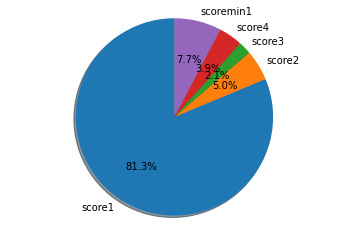

In [56]:
df_plot = df_conc[df_conc['name'] == 'int_latency_score']

labels = 'score1', 'score2', 'score3', 'score4', 'scoremin1'
sizes = [round((df_plot['score1'][df_plot['report'] == 0].values / 1000).astype(float)[0], 2),
         round((df_plot['score2'][df_plot['report'] == 0].values / 1000).astype(float)[0], 2),
         round((df_plot['score3'][df_plot['report'] == 0].values / 1000).astype(float)[0], 2),
         round((df_plot['score4'][df_plot['report'] == 0].values / 1000).astype(float)[0], 2),
         round((df_plot['scoremin1'][df_plot['report'] == 0].values / 1000).astype(float)[0], 2)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

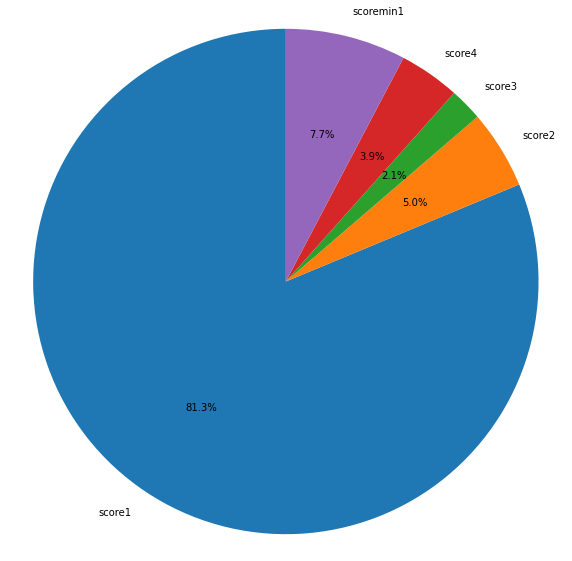

In [57]:
df_plot = df_conc[df_conc['name'] == 'int_latency_score']

labels = 'score1', 'score2', 'score3', 'score4', 'scoremin1'
sizes = [round((df_plot['score1'][df_plot['report'] == 0].values / 1000).astype(float)[0], 2),
         round((df_plot['score2'][df_plot['report'] == 0].values / 1000).astype(float)[0], 2),
         round((df_plot['score3'][df_plot['report'] == 0].values / 1000).astype(float)[0], 2),
         round((df_plot['score4'][df_plot['report'] == 0].values / 1000).astype(float)[0], 2),
         round((df_plot['scoremin1'][df_plot['report'] == 0].values / 1000).astype(float)[0], 2)]

fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [58]:
df_conc

,name,score1,score2,score3,score4,scoremin1,report
0,int_latency_score,81277,5027,2100,3889,7707,0
1,int_latency_score,75658,5491,2345,4467,12039,1
2,ext_latency_score,88896,2339,265,277,8223,0
3,ext_latency_score,84354,2010,246,294,13096,1
4,fd_latency_score,43759,26794,9155,14616,5676,0
5,fd_latency_score,39554,24750,9051,15983,10662,1
6,int_ploss_score,70987,25732,1481,1570,230,0
7,int_ploss_score,66450,26766,1946,2236,2602,1
8,ext_ploss_score,86724,10406,675,659,1536,0
9,ext_ploss_score,82993,11226,971,2568,2242,1


<AxesSubplot:xlabel='name', ylabel='score1'>

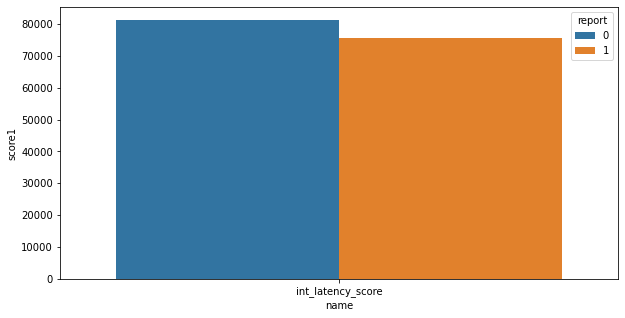

In [59]:
plt.figure(figsize=(10, 5))
df_plot = df_conc[df_conc['name'] == 'int_latency_score']
sns.barplot(data=df_plot, x='name', y='score1', hue='report')

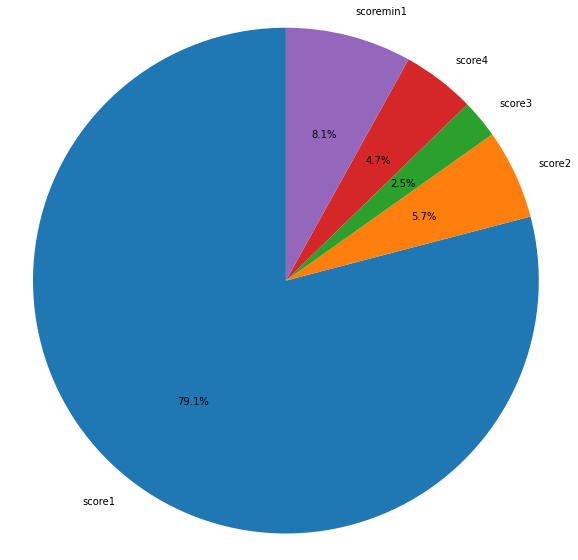

In [60]:
df_plot = df_conc[df_conc['name'] == 'int_latency_score']

labels = 'score1', 'score2', 'score3', 'score4', 'scoremin1'
sizes = [round((df_plot['score1'][df_plot['report'] == 1].values / 1000).astype(float)[0], 2),
         round((df_plot['score2'][df_plot['report'] == 1].values / 1000).astype(float)[0], 2),
         round((df_plot['score3'][df_plot['report'] == 1].values / 1000).astype(float)[0], 2),
         round((df_plot['score4'][df_plot['report'] == 1].values / 1000).astype(float)[0], 2),
         round((df_plot['scoremin1'][df_plot['report'] == 0].values / 1000).astype(float)[0], 2)]

fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

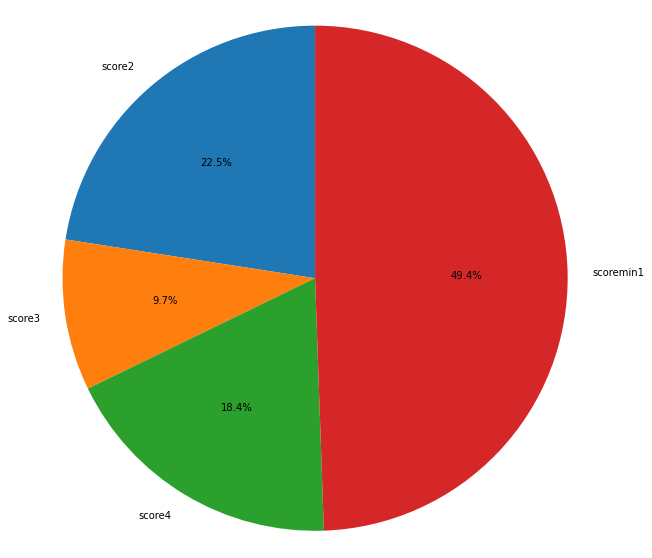

In [61]:
df_plot = df_conc[df_conc['name'] == 'int_latency_score']

labels = 'score2', 'score3', 'score4', 'scoremin1'
sizes = [round((df_plot['score2'][df_plot['report'] == 1].values / 1000).astype(float)[0], 2),
         round((df_plot['score3'][df_plot['report'] == 1].values / 1000).astype(float)[0], 2),
         round((df_plot['score4'][df_plot['report'] == 1].values / 1000).astype(float)[0], 2),
         round((df_plot['scoremin1'][df_plot['report'] == 1].values / 1000).astype(float)[0], 2)]

fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [62]:
score_name = ['int_latency_score', 'ext_latency_score', 'fd_latency_score', 'int_ploss_score',
              'ext_ploss_score', 'ses_setup_score', 'ser_acces_score']

df_plot0 = df_conc[['name', 'score4', 'report']][df_conc['name'] == score_name[0]]
df_plot1 = df_conc[['name', 'score4', 'report']][df_conc['name'] == score_name[1]]
df_plot2 = df_conc[['name', 'score4', 'report']][df_conc['name'] == score_name[2]]
df_plot3 = df_conc[['name', 'score4', 'report']][df_conc['name'] == score_name[3]]
df_plot4 = df_conc[['name', 'score4', 'report']][df_conc['name'] == score_name[4]]
df_plot5 = df_conc[['name', 'score4', 'report']][df_conc['name'] == score_name[5]]
df_plot6 = df_conc[['name', 'score4', 'report']][df_conc['name'] == score_name[6]]

In [63]:
df_plot6

,name,score4,report
12,ser_acces_score,8612,0
13,ser_acces_score,9132,1


In [64]:
df4_r0 = df_conc[['name', 'score4']][df_conc['report'] == 0]
df4_r1 = df_conc[['name', 'score4']][df_conc['report'] == 1]

In [65]:
df4_r0

,name,score4
0,int_latency_score,3889
2,ext_latency_score,277
4,fd_latency_score,14616
6,int_ploss_score,1570
8,ext_ploss_score,659
10,ses_setup_score,844
12,ser_acces_score,8612


In [66]:
df4_r1

,name,score4
1,int_latency_score,4467
3,ext_latency_score,294
5,fd_latency_score,15983
7,int_ploss_score,2236
9,ext_ploss_score,2568
11,ses_setup_score,1065
13,ser_acces_score,9132


<AxesSubplot:xlabel='name', ylabel='score4'>

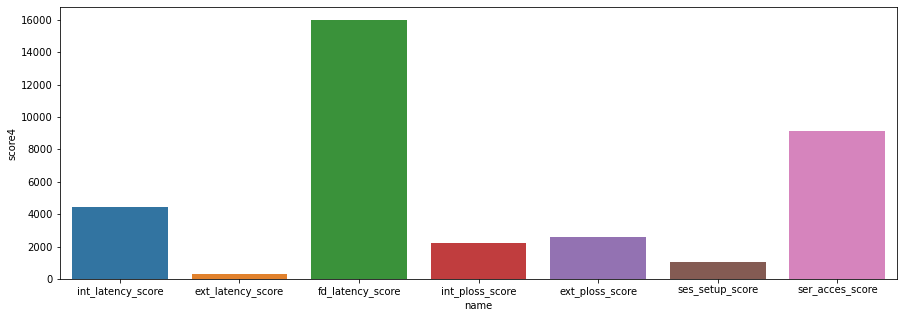

In [74]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df4_r1, x='name', y='score4')
# plt.yticks([])

In [75]:
df_conc

,name,score1,score2,score3,score4,scoremin1,report
0,int_latency_score,81277,5027,2100,3889,7707,0
1,int_latency_score,75658,5491,2345,4467,12039,1
2,ext_latency_score,88896,2339,265,277,8223,0
3,ext_latency_score,84354,2010,246,294,13096,1
4,fd_latency_score,43759,26794,9155,14616,5676,0
5,fd_latency_score,39554,24750,9051,15983,10662,1
6,int_ploss_score,70987,25732,1481,1570,230,0
7,int_ploss_score,66450,26766,1946,2236,2602,1
8,ext_ploss_score,86724,10406,675,659,1536,0
9,ext_ploss_score,82993,11226,971,2568,2242,1


## July 16 2021

In [3]:
def make_df_bin(bin_1h, sample):
    cols = ['user_id', 'date_time', 'reportdate', 'bin_1h', 'int_latency_score', 'ext_latency_score', 'fd_latency_score',
            'int_ploss_score', 'ext_ploss_score', 'ses_setup_score', 'ser_acces_score']

    report1 = df[cols][(df['bin_1h'] >= bin_1h) & (df['bin_1h'] < 0)].drop_duplicates().sample(sample)
    report1.drop('user_id', axis=1, inplace=True)
    report1['report_0_1'] = 1
    
    report0 = df[cols][(df['bin_1h'] < bin_1h) | (df['bin_1h'] > 0)].drop_duplicates().sample(sample)
    report0.drop('user_id', axis=1, inplace=True)
    report0['report_0_1'] = 0
    
    df_report = pd.concat([report1, report0])
    return df_report

        
def make_df_score(score_name, bin_1h=-48, sample=100000):
    try:
        cols = ['name', 'score1', 'score2', 'score3', 'score4', 'scoremin1', 'report']
        score_lst = [1, 2, 3, 4, -1]

        df_report = make_df_bin(bin_1h, sample)
        df_score = pd.DataFrame(columns=cols)
        df_score['report'] = [0, 1]
        for n1, score in zip(range(1, 6), score_lst):
            for n2 in range(0, 2):
                df_score[cols[n1]][df_score['report'] == n2] = df_report[(df_report['report_0_1'] == n2) &
                                                                         (df_report[score_name] == score)].shape[0]                                                                  
        df_score['name'] = score_name
        return df_score
    except:
        print('Error! Please specify less smaller sample size.')
 

In [4]:
lst = ['int_latency_score', 'ext_latency_score', 'fd_latency_score', 'int_ploss_score', 'ext_ploss_score',
       'ses_setup_score', 'ser_acces_score']

start_time = time.time()
df_conc = pd.concat([make_df_score(lst[0]), make_df_score(lst[1]), make_df_score(lst[2]), make_df_score(lst[3]),
                     make_df_score(lst[4]), make_df_score(lst[5]), make_df_score(lst[6])])
print('Time elapsed: {}'.format((time.time() - start_time)))

Time elapsed: 18.257364749908447


In [5]:
df_conc.reset_index(drop=True, inplace=True)

In [6]:
df_conc

,name,score1,score2,score3,score4,scoremin1,report
0,int_latency_score,81155,5125,1998,3900,7822,0
1,int_latency_score,75753,5424,2331,4474,12018,1
2,ext_latency_score,89075,2288,271,264,8102,0
3,ext_latency_score,84293,2036,246,298,13127,1
4,fd_latency_score,43497,26711,9310,14850,5632,0
5,fd_latency_score,39553,24740,9021,16033,10653,1
6,int_ploss_score,71108,25693,1519,1475,205,0
7,int_ploss_score,66392,26749,1967,2250,2642,1
8,ext_ploss_score,86833,10239,707,656,1565,0
9,ext_ploss_score,82998,11189,963,2594,2256,1


In [7]:
df_conc[['score1', 'score2', 'score3', 'score4', 'scoremin1']] = round(df_conc[['score1', 'score2', 'score3', 'score4', 'scoremin1']].astype(int) / 1000, 2)

In [8]:
df_conc

,name,score1,score2,score3,score4,scoremin1,report
0,int_latency_score,81.16,5.12,2.00,3.90,7.82,0
1,int_latency_score,75.75,5.42,2.33,4.47,12.02,1
2,ext_latency_score,89.08,2.29,0.27,0.26,8.10,0
3,ext_latency_score,84.29,2.04,0.25,0.30,13.13,1
4,fd_latency_score,43.50,26.71,9.31,14.85,5.63,0
5,fd_latency_score,39.55,24.74,9.02,16.03,10.65,1
6,int_ploss_score,71.11,25.69,1.52,1.48,0.20,0
7,int_ploss_score,66.39,26.75,1.97,2.25,2.64,1
8,ext_ploss_score,86.83,10.24,0.71,0.66,1.56,0
9,ext_ploss_score,83.00,11.19,0.96,2.59,2.26,1


<AxesSubplot:xlabel='name', ylabel='score1'>

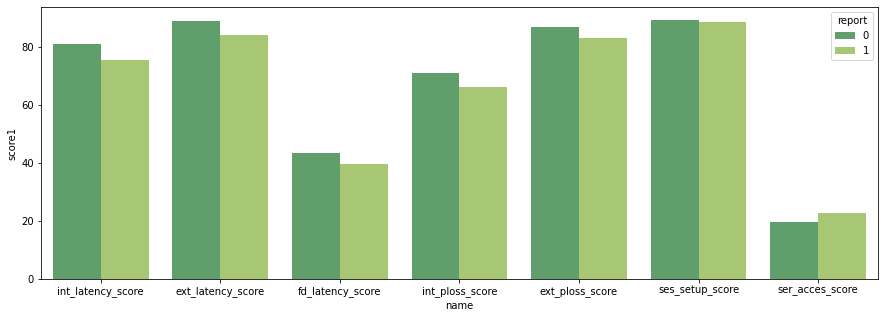

In [107]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df_conc, x='name', y='score1', hue='report', palette='summer')

<AxesSubplot:xlabel='name', ylabel='score2'>

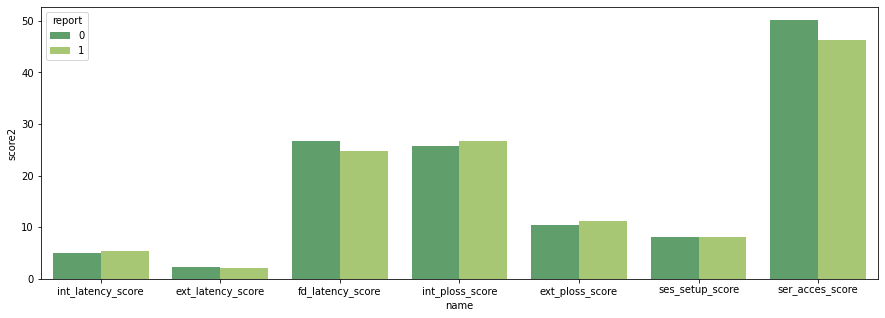

In [108]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df_conc, x='name', y='score2', hue='report', palette='summer')

<AxesSubplot:xlabel='name', ylabel='score3'>

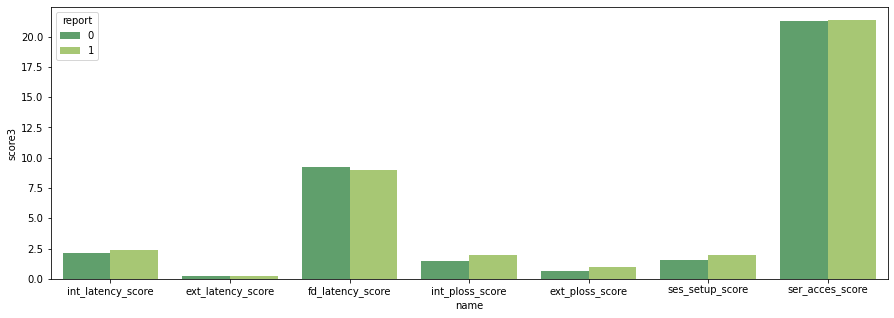

In [109]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df_conc, x='name', y='score3', hue='report', palette='summer')

<AxesSubplot:xlabel='name', ylabel='score4'>

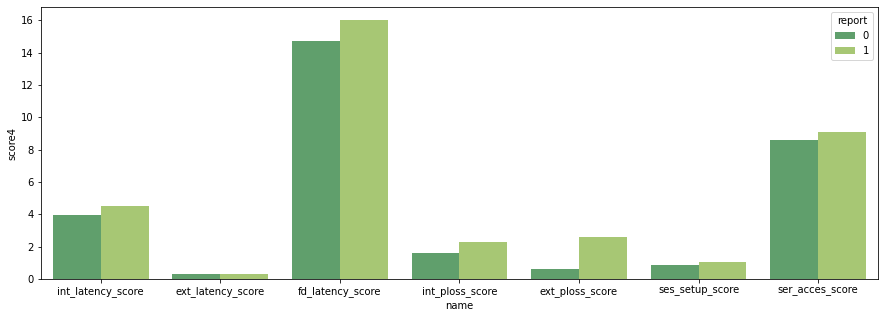

In [110]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df_conc, x='name', y='score4', hue='report', palette='summer')

<AxesSubplot:xlabel='name', ylabel='scoremin1'>

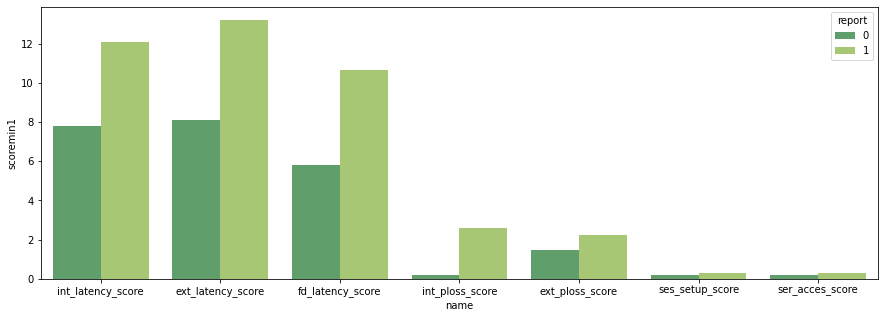

In [111]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df_conc, x='name', y='scoremin1', hue='report', palette='summer')

In [3]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_feather('D:/internship-telkom/data-science/slow-connection/CW02_dataset.ftr')

def make_df_bin(bin_1h, sample):
    cols = ['user_id', 'date_time', 'reportdate', 'bin_1h', 'int_latency_score', 'ext_latency_score', 'fd_latency_score',
            'int_ploss_score', 'ext_ploss_score', 'ses_setup_score', 'ser_acces_score']

    report1 = df[cols][(df['bin_1h'] >= bin_1h) & (df['bin_1h'] < 0)].drop_duplicates().sample(sample)
    report1.drop('user_id', axis=1, inplace=True)
    report1['report_0_1'] = 1
    
    report0 = df[cols][(df['bin_1h'] < bin_1h) | (df['bin_1h'] > 0)].drop_duplicates().sample(sample)
    report0.drop('user_id', axis=1, inplace=True)
    report0['report_0_1'] = 0
    
    df_report = pd.concat([report1, report0])
    return df_report

        
def make_df_score(score_name, bin_1h=-48, sample=100000):
    try:
        cols = ['name', 'score1', 'score2', 'score3', 'score4', 'scoremin1', 'report']
        score_lst = [1, 2, 3, 4, -1]

        df_report = make_df_bin(bin_1h, sample)
        df_score = pd.DataFrame(columns=cols)
        df_score['report'] = [0, 1]
        for n1, score in zip(range(1, 6), score_lst):
            for n2 in range(0, 2):
                df_score[cols[n1]][df_score['report'] == n2] = df_report[(df_report['report_0_1'] == n2) &
                                                                         (df_report[score_name] == score)].shape[0]                                                                  
        df_score['name'] = score_name
        return df_score
    except:
        print('Error! Please specify less smaller sample size.')


cols = [col for col in df.columns if 'score' in col]

df_conc = pd.concat([make_df_score(cols[0]), make_df_score(cols[1]), make_df_score(cols[2]), make_df_score(cols[3]),
                     make_df_score(cols[4]), make_df_score(cols[5]), make_df_score(cols[6])])
df_conc.reset_index(drop=True, inplace=True)
df_conc[['score1', 'score2', 'score3', 'score4', 'scoremin1']] = round(df_conc[['score1', 'score2', 'score3', 'score4', 'scoremin1']].astype(int) / 1000, 2)
print(df_conc)

                 name  score1  score2  score3  score4  scoremin1  report
0   int_latency_score   81.25    5.12    2.16    3.78       7.69       0
1   int_latency_score   75.57    5.44    2.36    4.53      12.10       1
2   ext_latency_score   88.97    2.32    0.25    0.28       8.18       0
3   ext_latency_score   84.28    2.05    0.24    0.29      13.14       1
4    fd_latency_score   43.61   26.73    9.28   14.83       5.55       0
5    fd_latency_score   39.68   24.73    9.00   15.96      10.62       1
6     int_ploss_score   71.06   25.62    1.57    1.56       0.19       0
7     int_ploss_score   66.52   26.66    1.98    2.23       2.61       1
8     ext_ploss_score   86.60   10.48    0.67    0.65       1.60       0
9     ext_ploss_score   82.94   11.24    0.96    2.60       2.25       1
10    ses_setup_score   89.27    8.00    1.64    0.90       0.20       0
11    ses_setup_score   88.61    8.06    1.96    1.07       0.31       1
12    ser_acces_score   19.73   50.12   21.22    8.

In [4]:
df_conc

,name,score1,score2,score3,score4,scoremin1,report
0,int_latency_score,81.25,5.12,2.16,3.78,7.69,0
1,int_latency_score,75.57,5.44,2.36,4.53,12.10,1
2,ext_latency_score,88.97,2.32,0.25,0.28,8.18,0
3,ext_latency_score,84.28,2.05,0.24,0.29,13.14,1
4,fd_latency_score,43.61,26.73,9.28,14.83,5.55,0
5,fd_latency_score,39.68,24.73,9.00,15.96,10.62,1
6,int_ploss_score,71.06,25.62,1.57,1.56,0.19,0
7,int_ploss_score,66.52,26.66,1.98,2.23,2.61,1
8,ext_ploss_score,86.60,10.48,0.67,0.65,1.60,0
9,ext_ploss_score,82.94,11.24,0.96,2.60,2.25,1
